In [ ]:
#Подсчёт количество строк

import os

def analyze_lines_in_txt(directory):
    total_lines = 0
    file_count = 0
    min_lines = float('inf')
    max_lines = 0
    
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                line_count = len(lines)
                
                total_lines += line_count
                file_count += 1
                
                if line_count < min_lines:
                    min_lines = line_count
                if line_count > max_lines:
                    max_lines = line_count
                
    if file_count == 0:
        return 0, 0, 0  # Если нет txt файлов в папке, возвращаем нули
    
    average_lines = total_lines / file_count
    return average_lines, min_lines, max_lines

directory_path = '3ОФ34 - 120mm'
average_lines, min_lines, max_lines = analyze_lines_in_txt(directory_path)

print(f"Среднее количество строк во всех .txt файлах: {average_lines}")
print(f"Минимальное количество строк: {min_lines}")
print(f"Максимальное количество строк: {max_lines}")


Среднее количество строк во всех .txt файлах: 679.3030303030303
Минимальное количество строк: 116
Максимальное количество строк: 1088


# Создание train


In [25]:
import os

def extract_middle_10_lines_with_header(source_dir, target_dir):
    # Создаем целевую папку, если она не существует
    os.makedirs(target_dir, exist_ok=True)
    
    # Заголовок для нового файла
    header = "t(c) x(м) y(м) z(м) Vk(м/с) teta(град) psy(град) omega_x(рад/с) pi(y) m(кг)\n"
    
    for filename in os.listdir(source_dir):
        if filename.endswith('.txt'):
            source_path = os.path.join(source_dir, filename)
            target_path = os.path.join(target_dir, filename)
            
            with open(source_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                
                # Найти середину файла
                total_lines = len(lines)
                if total_lines < 10:
                    print(f"Файл {filename} содержит менее 10 строк, пропускается.")
                    continue
                
                start_index = total_lines // 2 - 5  # Индекс первой из 10 строк
                start_index = max(0, start_index)   # На случай, если файл меньше 10 строк
                
                # Извлечь 10 строк, начиная с найденного индекса
                middle_10_lines = lines[start_index:start_index + 10]
                
                # Записать заголовок и 10 строк в новый файл
                with open(target_path, 'w', encoding='utf-8') as target_file:
                    target_file.write(header)            # Записываем заголовок
                    target_file.writelines(middle_10_lines)  # Записываем выбранные 10 строк
                    
    print("Копирование строк с заголовком завершено.")

source_directory = '3ОФ34 - 120mm_new'
target_directory = '3ОФ32-120mm_train_new'
extract_middle_10_lines_with_header(source_directory, target_directory)


Копирование строк с заголовком завершено.


# Приведение исходных данных к одному размеру по строкам

In [24]:
import os

# Папки
source_folder = '3ОФ34 - 120mm'
destination_folder = '3ОФ34 - 120mm_new'

# Создаем папку назначения, если её нет
os.makedirs(destination_folder, exist_ok=True)

# Получаем минимальное количество строк среди всех файлов в исходной папке
min_lines = None
for filename in os.listdir(source_folder):
    file_path = os.path.join(source_folder, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            line_count = sum(1 for _ in file)
            if min_lines is None or line_count < min_lines:
                min_lines = line_count

# Проверка, что найдено значение для min_lines
if min_lines is not None:
    # Копируем первые min_lines строк из каждого файла
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        if os.path.isfile(source_path):
            with open(source_path, 'r', encoding='utf-8') as src_file, \
                 open(destination_path, 'w', encoding='utf-8') as dest_file:
                # Записываем первые min_lines строк
                for i, line in enumerate(src_file):
                    if i >= min_lines:
                        break
                    dest_file.write(line)

    print(f"Файлы успешно скопированы с первыми {min_lines} строками в папку {destination_folder}.")
else:
    print("В исходной папке не найдено текстовых файлов.")


Файлы успешно скопированы с первыми 116 строками в папку 3ОФ34 - 120mm_new.


# Убирате лишние стобцы

In [27]:
import os

# Папка с файлами
folder_path = '3ОФ32-120mm_train_new'

# Обработка файлов
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        # Читаем файл и обрабатываем его
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
        
        # Оставляем только первые 4 столбца в каждой строке
        modified_lines = []
        for line in lines:
            # Разделяем строку на столбцы по пробелу, табуляции или запятой
            columns = line.split()
            # Оставляем только первые 4 столбца и объединяем их обратно
            modified_line = ' '.join(columns[:4])
            modified_lines.append(modified_line)
        
        # Перезаписываем файл с измененными строками
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write('\n'.join(modified_lines))

print("Все файлы успешно обработаны, оставлены только первые 4 столбца.")


Все файлы успешно обработаны, оставлены только первые 4 столбца.


# Заменяет запятые на точки

In [37]:
import os

# Укажите путь к папкам
train_path = '3ОФ32-120mm_train_new'  # Замените на фактический путь
predict_path = '3ОФ34 - 120mm_new'  # Замените на фактический путь

# Функция для замены запятых на точки
def replace_commas_with_dots(folder):
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        if os.path.isfile(filepath) and filename.endswith('.txt'):  # Обработка только текстовых файлов
            with open(filepath, 'r') as file:
                content = file.read()
            # Замена запятых на точки
            content = content.replace(',', '.')
            with open(filepath, 'w') as file:
                file.write(content)
            print(f'Обработан файл: {filepath}')

# Обработка папок
replace_commas_with_dots(train_path)
replace_commas_with_dots(predict_path)


Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 10.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 11.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 12.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 13.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 14.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 15.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 16.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 17.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 18.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 19.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 20.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 21.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 22.txt
Обработан файл: 3ОФ32-120mm_train_new\Траектория 3ОФ34 угол = 23.txt
Обработан файл: 3ОФ32-120mm_train_

# Удалить заголовки


In [58]:
import os

# Путь к папке, содержащей файлы
folder_path = '3ОФ32-120mm_train_new'

# Перебираем все файлы в папке
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)

        # Чтение файла и запись без заголовка
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Запись в тот же файл без первой строки (заголовка)
        with open(file_path, 'w') as file:
            file.writelines(lines[1:])

import os

# Путь к папке, содержащей файлы
folder_path = '3ОФ34 - 120mm_new'

# Перебираем все файлы в папке
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)

        # Чтение файла и запись без заголовка
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Запись в тот же файл без первой строки (заголовка)
        with open(file_path, 'w') as file:
            file.writelines(lines[1:])


# Попытка начать обучение

# Вроде как рекурентная модель

In [69]:
import os
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Пути к папкам с данными
folder_full_path = '3ОФ34 - 120mm_new'
folder_partial_path = '3ОФ32-120mm_train_new'

# Функция для загрузки данных из файлов
def load_data(folder_path):
    trajectories = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            data = np.loadtxt(file_path)
            trajectories.append(data)
    return trajectories

# Загрузка данных
full_trajectories = load_data(folder_full_path)   # Полные траектории
partial_trajectories = load_data(folder_partial_path)  # Частичные траектории

class TrajectoryDataset(Dataset):
    def __init__(self, partial, full):
        self.partial = partial
        self.full = full

    def __len__(self):
        return len(self.partial)

    def __getitem__(self, idx):
        partial_trajectory = torch.tensor(self.partial[idx], dtype=torch.float32)
        full_trajectory = torch.tensor(self.full[idx], dtype=torch.float32)
        return partial_trajectory, full_trajectory

# Создание набора данных и загрузчика данных
dataset = TrajectoryDataset(partial_trajectories, full_trajectories)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)  # batch_size=1 для итеративного предсказания

# Определение модели LSTM
class TrajectoryPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(TrajectoryPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Предсказать только следующую точку
        return out

# Параметры модели
input_size = 4  # Параметры t, x, y, z
hidden_size = 64
output_size = 4
num_layers = 2

model = TrajectoryPredictor(input_size, hidden_size, output_size, num_layers)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 50
for epoch in range(num_epochs):
    for partial, full in dataloader:
        # Используем первые 9 точек для предсказания оставшихся
        input_seq = partial[:, :9, :]  # Начальная часть траектории
        predicted_trajectory = input_seq.clone()

        # Итеративное предсказание следующей точки
        for i in range(9, full.size(1)):
            next_point = model(input_seq)
            predicted_trajectory = torch.cat((predicted_trajectory, next_point.unsqueeze(1)), dim=1)
            input_seq = predicted_trajectory[:, -9:, :]  # Обновляем входные данные

        # Вычисляем ошибку только для предсказанной части
        loss = criterion(predicted_trajectory, full)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Обучение завершено!")


Epoch [10/50], Loss: 242155.5938
Epoch [20/50], Loss: 208191.7031


KeyboardInterrupt: 

# версия 2

In [72]:
import os
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Пути к папкам с данными
folder_full_path = '3ОФ34 - 120mm_new'
folder_partial_path = '3ОФ32-120mm_train_new'

# Функция для загрузки данных из файлов
def load_data(folder_path):
    trajectories = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            data = np.loadtxt(file_path)
            trajectories.append(data)
    return trajectories

# Загрузка данных
print("Считывание данных...")
full_trajectories = load_data(folder_full_path)   # Полные траектории
partial_trajectories = load_data(folder_partial_path)  # Частичные траектории
print("Данные считаны.")

class TrajectoryDataset(Dataset):
    def __init__(self, partial, full):
        self.partial = partial
        self.full = full

    def __len__(self):
        return len(self.partial)

    def __getitem__(self, idx):
        partial_trajectory = torch.tensor(self.partial[idx], dtype=torch.float32)
        full_trajectory = torch.tensor(self.full[idx], dtype=torch.float32)
        return partial_trajectory, full_trajectory

# Создание набора данных и загрузчика данных
dataset = TrajectoryDataset(partial_trajectories, full_trajectories)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Определение улучшенной модели LSTM
class EnhancedTrajectoryPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.3):
        super(EnhancedTrajectoryPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_size // 2, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM слой
        out = self.fc1(out[:, -1, :])  # Полносвязный слой с активацией
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)  # Финальный полносвязный слой
        return out

# Параметры модели
input_size = 4  # Параметры t, x, y, z
hidden_size = 128  # Увеличенный скрытый размер для лучшего представления
output_size = 4
num_layers = 2

model = EnhancedTrajectoryPredictor(input_size, hidden_size, output_size, num_layers)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 50
print("Начало обучения...")
for epoch in range(num_epochs):
    epoch_loss = 0
    for partial, full in dataloader:
        # Используем первые 9 точек для предсказания оставшихся
        input_seq = partial[:, :9, :]  # Начальная часть траектории
        predicted_trajectory = input_seq.clone()

        # Итеративное предсказание следующей точки
        for j in range(9, full.size(1)):
            next_point = model(input_seq)
            predicted_trajectory = torch.cat((predicted_trajectory, next_point.unsqueeze(1)), dim=1)
            input_seq = predicted_trajectory[:, -9:, :]  # Обновляем входные данные

        # Вычисляем ошибку только для предсказанной части
        loss = criterion(predicted_trajectory, full)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Средняя потеря по эпохе
    avg_loss = epoch_loss / len(dataloader)
    print(f"Эпоха {epoch+1}/{num_epochs}, Средняя потеря: {avg_loss:.4f}")

print("Обучение завершено!")


Считывание данных...
Данные считаны.
Начало обучения...
Эпоха 1/50, Средняя потеря: 244837.9152
Эпоха 2/50, Средняя потеря: 205613.5180
Эпоха 3/50, Средняя потеря: 146813.0945
Эпоха 4/50, Средняя потеря: 101594.8107
Эпоха 5/50, Средняя потеря: 230904.7782
Эпоха 6/50, Средняя потеря: 187424.1634
Эпоха 7/50, Средняя потеря: 120226.3795
Эпоха 8/50, Средняя потеря: 86616.2053
Эпоха 9/50, Средняя потеря: 72438.5431
Эпоха 10/50, Средняя потеря: 67196.9503
Эпоха 11/50, Средняя потеря: 67212.7158
Эпоха 12/50, Средняя потеря: 64221.9667
Эпоха 13/50, Средняя потеря: 59403.4955
Эпоха 14/50, Средняя потеря: 59847.7748
Эпоха 15/50, Средняя потеря: 60316.0666
Эпоха 16/50, Средняя потеря: 79010.4613
Эпоха 17/50, Средняя потеря: 69527.0749
Эпоха 18/50, Средняя потеря: 58989.5576
Эпоха 19/50, Средняя потеря: 62865.0576
Эпоха 20/50, Средняя потеря: 58368.7513
Эпоха 21/50, Средняя потеря: 62765.7056
Эпоха 22/50, Средняя потеря: 61465.5109
Эпоха 23/50, Средняя потеря: 57924.8287
Эпоха 24/50, Средняя потер

# Версия 3

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Определение датасета
class TrajectoryDataset(Dataset):
    def __init__(self, partial_trajectories, full_trajectories):
        self.partial_trajectories = partial_trajectories
        self.full_trajectories = full_trajectories

    def __len__(self):
        return len(self.partial_trajectories)

    def __getitem__(self, idx):
        return self.partial_trajectories[idx], self.full_trajectories[idx]

# Определение модели
class AdvancedTrajectoryPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.3):
        super(AdvancedTrajectoryPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM слой
        out = self.fc(out)  # Применяем полносвязный слой к каждому выходу LSTM
        return out  # Возвращаем все предсказания

# Параметры
input_size = 4  # 4 координаты (x, y, z, w)
hidden_size = 256
output_size = 4  # Предсказание следующей точки
num_layers = 2
dropout = 0.3

# Инициализация модели, оптимизатора и функции потерь
model = AdvancedTrajectoryPredictor(input_size, hidden_size, output_size, num_layers, dropout)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Пример данных (замените на ваши реальные данные)
# Предположим, у вас есть 100 последовательностей по 115 точек
num_sequences = 100
num_points = 115

partial_trajectories = torch.randn(num_sequences, num_points, input_size)  # 100 примеров, 115 временных шагов
full_trajectories = torch.randn(num_sequences, num_points, output_size)  # Аналогично, для полных траекторий

# Создание загрузчика данных с размером батча больше 1
dataset = TrajectoryDataset(partial_trajectories, full_trajectories)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)  # Увеличьте размер батча по необходимости

# Обучение модели
num_epochs = 20
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()  # Обнуление градиентов
        outputs = model(inputs)  # Прямой проход
        # Целевые значения должны быть той же формы, что и выходы
        loss = criterion(outputs.view(-1, output_size), targets.view(-1, output_size))  # Вычисление потерь
        loss.backward()  # Обратный проход
        optimizer.step()  # Обновление параметров

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Итеративное предсказание следующей точки
# Начнем с последней известной последовательности
full = torch.randn(1, num_points, input_size)  # Пример входной последовательности
predicted_trajectory = full.clone()  # Сохранение полного предсказания

# Прогнозирование следующих точек
for j in range(9):  # Предсказываем 9 дополнительных точек
    next_point = model(full)  # Получаем предсказание следующей точки
    predicted_trajectory = torch.cat((predicted_trajectory, next_point.unsqueeze(1)), dim=1)
    full = predicted_trajectory[:, -num_points:, :]  # Обновляем входные данные для следующего предсказания

print("Предсказанная траектория:", predicted_trajectory)


Epoch [1/20], Loss: 0.9884
Epoch [2/20], Loss: 1.0371
Epoch [3/20], Loss: 0.9976
Epoch [4/20], Loss: 0.9254
Epoch [5/20], Loss: 1.0055
Epoch [6/20], Loss: 0.9922
Epoch [7/20], Loss: 0.9833
Epoch [8/20], Loss: 1.0174
Epoch [9/20], Loss: 0.9695
Epoch [10/20], Loss: 1.0298
Epoch [11/20], Loss: 1.0039
Epoch [12/20], Loss: 0.9430
Epoch [13/20], Loss: 0.9634
Epoch [14/20], Loss: 0.9770
Epoch [15/20], Loss: 1.0043
Epoch [16/20], Loss: 1.0010
Epoch [17/20], Loss: 0.9642
Epoch [18/20], Loss: 0.9602
Epoch [19/20], Loss: 0.9742
Epoch [20/20], Loss: 1.0074


RuntimeError: Tensors must have same number of dimensions: got 3 and 4

# ПРобую начать сначала

In [77]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import glob

# 1. Подготовка данных
class TrajectoryDataset(Dataset):
    def __init__(self, folder_path):
        self.data = []
        # Загрузка всех .txt файлов из указанной папки
        for file in glob.glob(folder_path + '/*.txt'):
            points = np.loadtxt(file)
            # Используем 9 точек для прогноза следующей
            for i in range(len(points) - 9):
                input_seq = points[i:i+9, 1:4]  # x, y, z
                target_point = points[i + 9, 1:4]  # следующее x, y, z
                self.data.append((input_seq, target_point))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_seq, target_point = self.data[idx]
        return torch.tensor(input_seq, dtype=torch.float32), torch.tensor(target_point, dtype=torch.float32)

# 2. Определение модели
class LSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=64, output_size=3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x.view(len(x), 9, -1))  # изменение формы для LSTM
        out = self.fc(out[:, -1, :])  # последний временной шаг
        return out

# 3. Обучение модели
def train_model(model, dataloader, criterion, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Параметры
folder_path = '3ОФ34 - 120mm_new'  # Укажите путь к вашей папке
dataset = TrajectoryDataset(folder_path)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Инициализация модели, функции потерь и оптимизатора
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
train_model(model, dataloader, criterion, optimizer, num_epochs=100)

# 4. Оценка модели
# Для оценки модели можно использовать тестовый набор данных аналогичным образом, как это сделано для обучения.


Epoch [10/100], Loss: 233029.5156
Epoch [20/100], Loss: 187315.5000
Epoch [30/100], Loss: 140465.4531
Epoch [40/100], Loss: 110768.7812
Epoch [50/100], Loss: 63788.8203
Epoch [60/100], Loss: 35821.4453
Epoch [70/100], Loss: 66205.8203
Epoch [80/100], Loss: 30724.9160
Epoch [90/100], Loss: 19226.8047
Epoch [100/100], Loss: 14809.2314


In [78]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import glob

# 1. Подготовка данных
class TrajectoryDataset(Dataset):
    def __init__(self, folder_path):
        self.data = []
        # Загрузка всех .txt файлов из указанной папки
        for file in glob.glob(folder_path + '/*.txt'):
            points = np.loadtxt(file)
            # Используем 9 точек для прогноза следующей
            for i in range(len(points) - 9):
                input_seq = points[i:i+9, 1:4]  # x, y, z
                target_point = points[i + 9, 1:4]  # следующее x, y, z
                self.data.append((input_seq, target_point))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_seq, target_point = self.data[idx]
        return torch.tensor(input_seq, dtype=torch.float32), torch.tensor(target_point, dtype=torch.float32)

# 2. Определение модели с несколькими слоями LSTM и Dropout
class EnhancedLSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=64, output_size=3, num_layers=2, dropout=0.2):
        super(EnhancedLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x.view(len(x), 9, -1))  # изменение формы для LSTM
        out = out[:, -1, :]  # последний временной шаг
        out = self.fc1(out)  # полносвязный слой
        out = self.dropout(out)  # Dropout
        out = self.fc2(out)  # выходной слой
        return out

# 3. Обучение модели с выводом потерь
def train_model(model, dataloader, criterion, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        total_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        # Средняя потеря за эпоху
        average_loss = total_loss / len(dataloader)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Average Loss: {average_loss:.4f}')

# Параметры
folder_path = '3ОФ34 - 120mm_new'  # Укажите путь к вашей папке
dataset = TrajectoryDataset(folder_path)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Инициализация модели, функции потерь и оптимизатора
model = EnhancedLSTMModel(hidden_size=128, num_layers=3, dropout=0.3)  # Измените параметры, если нужно
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
train_model(model, dataloader, criterion, optimizer, num_epochs=100)

# 4. Оценка модели
# Для оценки модели можно использовать тестовый набор данных аналогичным образом, как это сделано для обучения.


Epoch [1/100], Average Loss: 185807.5113
Epoch [2/100], Average Loss: 83704.8263
Epoch [3/100], Average Loss: 42252.0301
Epoch [4/100], Average Loss: 40927.5985
Epoch [5/100], Average Loss: 40437.8197
Epoch [6/100], Average Loss: 40334.3941
Epoch [7/100], Average Loss: 40197.1594
Epoch [8/100], Average Loss: 40035.5684
Epoch [9/100], Average Loss: 34992.7417
Epoch [10/100], Average Loss: 13762.4872
Epoch [11/100], Average Loss: 5097.0991
Epoch [12/100], Average Loss: 3821.6043
Epoch [13/100], Average Loss: 3440.7724
Epoch [14/100], Average Loss: 3435.4286
Epoch [15/100], Average Loss: 3176.0637
Epoch [16/100], Average Loss: 3137.2597
Epoch [17/100], Average Loss: 3029.2622
Epoch [18/100], Average Loss: 3118.4914
Epoch [19/100], Average Loss: 3022.5094
Epoch [20/100], Average Loss: 2913.1809
Epoch [21/100], Average Loss: 3060.6941
Epoch [22/100], Average Loss: 2867.2943
Epoch [23/100], Average Loss: 2807.3852
Epoch [24/100], Average Loss: 2835.4069
Epoch [25/100], Average Loss: 2952.354

KeyboardInterrupt: 

# Пробую добавить график ошибки

Epoch [1/100], Average Loss: 185871.4130
Epoch [2/100], Average Loss: 78072.9476
Epoch [3/100], Average Loss: 42579.4603
Epoch [4/100], Average Loss: 41019.4674
Epoch [5/100], Average Loss: 40655.7527
Epoch [6/100], Average Loss: 40228.4849
Epoch [7/100], Average Loss: 40216.3797
Epoch [8/100], Average Loss: 40152.3538
Epoch [9/100], Average Loss: 40287.3154
Epoch [10/100], Average Loss: 39903.0709
Epoch [11/100], Average Loss: 38676.9656
Epoch [12/100], Average Loss: 18837.2314
Epoch [13/100], Average Loss: 5558.1252
Epoch [14/100], Average Loss: 4108.3667
Epoch [15/100], Average Loss: 3802.7888
Epoch [16/100], Average Loss: 3576.4993
Epoch [17/100], Average Loss: 3553.4855
Epoch [18/100], Average Loss: 3108.5633
Epoch [19/100], Average Loss: 3118.4751
Epoch [20/100], Average Loss: 2953.2699
Epoch [21/100], Average Loss: 3103.8676
Epoch [22/100], Average Loss: 2952.3817
Epoch [23/100], Average Loss: 3179.6932
Epoch [24/100], Average Loss: 3094.7652
Epoch [25/100], Average Loss: 2950.1

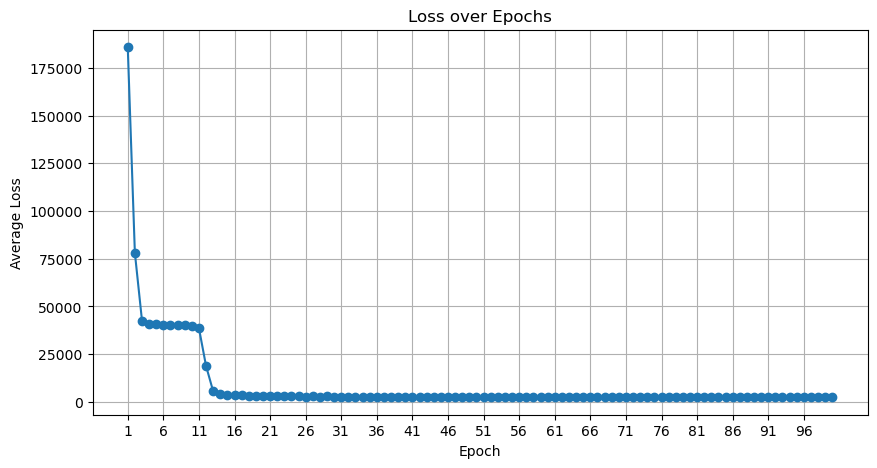

In [83]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import glob
import matplotlib.pyplot as plt

# 1. Подготовка данных
class TrajectoryDataset(Dataset):
    def __init__(self, folder_path):
        self.data = []
        # Загрузка всех .txt файлов из указанной папки
        for file in glob.glob(folder_path + '/*.txt'):
            points = np.loadtxt(file)
            # Используем 9 точек для прогноза следующей
            for i in range(len(points) - 9):
                input_seq = points[i:i+9, 1:4]  # x, y, z
                target_point = points[i + 9, 1:4]  # следующее x, y, z
                self.data.append((input_seq, target_point))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_seq, target_point = self.data[idx]
        return torch.tensor(input_seq, dtype=torch.float32), torch.tensor(target_point, dtype=torch.float32)

# 2. Определение модели с несколькими слоями LSTM и Dropout
class EnhancedLSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=64, output_size=3, num_layers=2, dropout=0.2):
        super(EnhancedLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x.view(len(x), 9, -1))  # изменение формы для LSTM
        out = out[:, -1, :]  # последний временной шаг
        out = self.fc1(out)  # полносвязный слой
        out = self.dropout(out)  # Dropout
        out = self.fc2(out)  # выходной слой
        return out

# 3. Обучение модели с выводом потерь
def train_model(model, dataloader, criterion, optimizer, num_epochs):
    loss_values = []  # Список для сохранения значений потерь
    for epoch in range(num_epochs):
        total_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        # Средняя потеря за эпоху
        average_loss = total_loss / len(dataloader)
        loss_values.append(average_loss)  # Сохраняем среднюю потерю
        print(f'Epoch [{epoch + 1}/{num_epochs}], Average Loss: {average_loss:.4f}')
    
    return loss_values  # Возвращаем значения потерь

# Параметры
folder_path = '3ОФ34 - 120mm_new'  # Укажите путь к вашей папке
num_epochs = 100 # Настраиваемое количество эпох
dataset = TrajectoryDataset(folder_path)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Инициализация модели, функции потерь и оптимизатора
model = EnhancedLSTMModel(hidden_size=128, num_layers=3, dropout=0.3)  # Измените параметры, если нужно
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
loss_values = train_model(model, dataloader, criterion, optimizer, num_epochs)

# 4. Построение графика потерь
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid()
plt.xticks(np.arange(1, num_epochs + 1, step=5))
plt.show()


Epoch [1/100], Average Loss: 336622.5749
Epoch [2/100], Average Loss: 312671.0644
Epoch [3/100], Average Loss: 278059.6985
Epoch [4/100], Average Loss: 237468.1742
Epoch [5/100], Average Loss: 196513.9873
Epoch [6/100], Average Loss: 160480.5633
Epoch [7/100], Average Loss: 132251.4885
Epoch [8/100], Average Loss: 112826.6864
Epoch [9/100], Average Loss: 88301.8306
Epoch [10/100], Average Loss: 72233.3746
Epoch [11/100], Average Loss: 58718.6958
Epoch [12/100], Average Loss: 43013.3881
Epoch [13/100], Average Loss: 29655.0953
Epoch [14/100], Average Loss: 20690.9674
Epoch [15/100], Average Loss: 14713.5146
Epoch [16/100], Average Loss: 10646.6720
Epoch [17/100], Average Loss: 8162.6918
Epoch [18/100], Average Loss: 6343.0634
Epoch [19/100], Average Loss: 5491.5345
Epoch [20/100], Average Loss: 4823.1553
Epoch [21/100], Average Loss: 4470.3508
Epoch [22/100], Average Loss: 3877.1681
Epoch [23/100], Average Loss: 3615.8022
Epoch [24/100], Average Loss: 3662.9077
Epoch [25/100], Average L

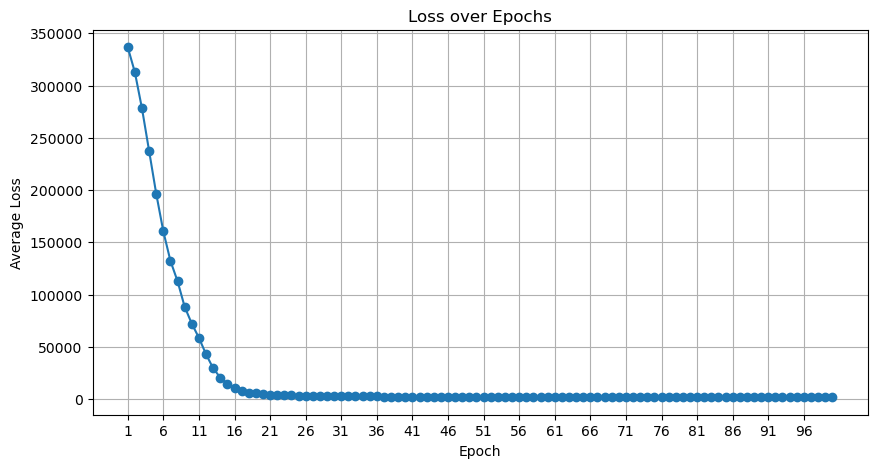

In [84]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import glob
import matplotlib.pyplot as plt

# 1. Подготовка данных
class TrajectoryDataset(Dataset):
    def __init__(self, folder_path):
        self.data = []
        # Загрузка всех .txt файлов из указанной папки
        for file in glob.glob(folder_path + '/*.txt'):
            points = np.loadtxt(file)
            # Используем 9 точек для прогноза следующей
            for i in range(len(points) - 9):
                input_seq = points[i:i+9, 1:4]  # x, y, z
                target_point = points[i + 9, 1:4]  # следующее x, y, z
                self.data.append((input_seq, target_point))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_seq, target_point = self.data[idx]
        return torch.tensor(input_seq, dtype=torch.float32), torch.tensor(target_point, dtype=torch.float32)

# 2. Определение улучшенной модели с несколькими слоями LSTM и Dense слоями
class DeepLSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=128, output_size=3, num_layers=4, dropout=0.2):
        super(DeepLSTMModel, self).__init__()
        self.lstm_layers = nn.ModuleList()
        
        # Добавление LSTM слоев
        for i in range(num_layers):
            in_features = input_size if i == 0 else hidden_size
            self.lstm_layers.append(nn.LSTM(in_features, hidden_size, batch_first=True, dropout=dropout, bidirectional=False))

        # Полносвязные слои
        self.fc1 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        # Нормализация слоев
        self.layer_norm1 = nn.LayerNorm(hidden_size * 2)
        self.layer_norm2 = nn.LayerNorm(hidden_size)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = x.view(len(x), 9, -1)  # Изменение формы для LSTM
        for lstm in self.lstm_layers:
            out, _ = lstm(out)

        out = out[:, -1, :]  # Используем последний временной шаг

        # Проход через полносвязные слои с нормализацией и активацией
        out = self.fc1(out)
        out = self.layer_norm1(out)  # Нормализация
        out = torch.relu(out)  # Активация
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.layer_norm2(out)  # Нормализация
        out = torch.relu(out)  # Активация
        out = self.dropout(out)

        out = self.fc3(out)  # Выходной слой
        return out

# 3. Обучение модели с выводом потерь
def train_model(model, dataloader, criterion, optimizer, num_epochs):
    loss_values = []  # Список для сохранения значений потерь
    for epoch in range(num_epochs):
        total_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        # Средняя потеря за эпоху
        average_loss = total_loss / len(dataloader)
        loss_values.append(average_loss)  # Сохраняем среднюю потерю
        print(f'Epoch [{epoch + 1}/{num_epochs}], Average Loss: {average_loss:.4f}')
    
    return loss_values  # Возвращаем значения потерь

# Параметры
folder_path = '3ОФ34 - 120mm_new'  # Укажите путь к вашей папке
num_epochs = 100  # Настраиваемое количество эпох
dataset = TrajectoryDataset(folder_path)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Инициализация модели, функции потерь и оптимизатора
model = DeepLSTMModel(hidden_size=128, num_layers=4, dropout=0.2)  # Измените параметры, если нужно
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
loss_values = train_model(model, dataloader, criterion, optimizer, num_epochs)

# 4. Построение графика потерь
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid()
plt.xticks(np.arange(1, num_epochs + 1, step=5))
plt.show()


In [85]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import glob
import optuna
import matplotlib.pyplot as plt

# 1. Подготовка данных (как в предыдущем коде)
class TrajectoryDataset(Dataset):
    def __init__(self, folder_path):
        self.data = []
        for file in glob.glob(folder_path + '/*.txt'):
            points = np.loadtxt(file)
            for i in range(len(points) - 9):
                input_seq = points[i:i+9, 1:4]
                target_point = points[i + 9, 1:4]
                self.data.append((input_seq, target_point))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_seq, target_point = self.data[idx]
        return torch.tensor(input_seq, dtype=torch.float32), torch.tensor(target_point, dtype=torch.float32)

# 2. Определение модели
class DeepLSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=128, output_size=3, num_layers=4, dropout=0.2):
        super(DeepLSTMModel, self).__init__()
        self.lstm_layers = nn.ModuleList()
        for i in range(num_layers):
            in_features = input_size if i == 0 else hidden_size
            self.lstm_layers.append(nn.LSTM(in_features, hidden_size, batch_first=True, dropout=dropout, bidirectional=False))
        self.fc1 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = x.view(len(x), 9, -1)
        for lstm in self.lstm_layers:
            out, _ = lstm(out)
        out = out[:, -1, :]
        out = self.fc1(out)
        out = torch.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = torch.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

# 3. Функция для оценки модели с заданными гиперпараметрами
def objective(trial):
    # Определяем гиперпараметры
    hidden_size = trial.suggest_int('hidden_size', 32, 256)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)

    # Загружаем данные
    folder_path = '3ОФ34 - 120mm_new'  # Укажите путь к вашей папке
    dataset = TrajectoryDataset(folder_path)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    # Инициализируем модель, функцию потерь и оптимизатор
    model = DeepLSTMModel(hidden_size=hidden_size, num_layers=num_layers, dropout=dropout)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Обучение модели
    num_epochs = 50  # Количество эпох
    for epoch in range(num_epochs):
        total_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        average_loss = total_loss / len(dataloader)

    return average_loss  # Возвращаем среднюю потерю

# 4. Настройка Optuna
study = optuna.create_study(direction='minimize')  # Минимизируем потерю
study.optimize(objective, n_trials=25)  # Количество попыток

# 5. Вывод результатов
print("Best hyperparameters: ", study.best_params)
print("Best loss: ", study.best_value)

# 6. Построение графика потерь по каждой попытке
trials_df = study.trials_dataframe()
plt.figure(figsize=(10, 5))
plt.plot(trials_df['number'], trials_df['value'], marker='o')
plt.title('Loss over Trials')
plt.xlabel('Trial Number')
plt.ylabel('Loss')
plt.grid()
plt.show()


c:\Users\PC1\anaconda3\envs\pytorch_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-04 12:13:31,925] A new study created in memory with name: no-name-394721e2-bc30-43eb-9052-80ed3c6e00d6
C:\Users\PC1\AppData\Local\Temp\ipykernel_10544\2485525082.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
c:\Users\PC1\anaconda3\envs\pytorch_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.428749517182775 and num_layers=1
  warnings

KeyboardInterrupt: 

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import glob
import optuna
import os
import matplotlib.pyplot as plt

# Создание папки для сохранения моделей
os.makedirs("models", exist_ok=True)

# 1. Подготовка данных
class TrajectoryDataset(Dataset):
    def __init__(self, folder_path):
        self.data = []
        for file in glob.glob(folder_path + '/*.txt'):
            points = np.loadtxt(file)
            for i in range(len(points) - 9):
                input_seq = points[i:i+9, 1:4]
                target_point = points[i + 9, 1:4]
                self.data.append((input_seq, target_point))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_seq, target_point = self.data[idx]
        return torch.tensor(input_seq, dtype=torch.float32), torch.tensor(target_point, dtype=torch.float32)

# 2. Определение улучшенной модели
class DeepLSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=128, output_size=3, num_layers=4, dropout=0.2):
        super(DeepLSTMModel, self).__init__()
        
        # LSTM-слои
        self.lstm_layers = nn.ModuleList()
        for i in range(num_layers):
            in_features = input_size if i == 0 else hidden_size
            self.lstm_layers.append(nn.LSTM(in_features, hidden_size, batch_first=True, dropout=dropout, bidirectional=False))
        
        # Полносвязные и нормализационные слои
        self.fc1 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        # BatchNorm и Dropout
        self.batch_norm1 = nn.BatchNorm1d(hidden_size * 2)
        self.batch_norm2 = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = x.view(len(x), 9, -1)
        for lstm in self.lstm_layers:
            out, _ = lstm(out)
        out = out[:, -1, :]
        
        # Проход через полносвязные слои с активацией и нормализацией
        out = self.fc1(out)
        out = self.batch_norm1(out)
        out = torch.relu(out)
        out = self.dropout(out)
        
        out = self.fc2(out)
        out = self.batch_norm2(out)
        out = torch.relu(out)
        out = self.dropout(out)
        
        out = self.fc3(out)
        return out

# 3. Функция для оценки модели с заданными гиперпараметрами
def objective(trial):
    # Определяем гиперпараметры
    hidden_size = trial.suggest_int('hidden_size', 32, 256)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)

    # Загружаем данные
    folder_path = '3ОФ34 - 120mm_new'  # Укажите путь к вашей папке
    dataset = TrajectoryDataset(folder_path)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    # Инициализируем модель, функцию потерь и оптимизатор
    model = DeepLSTMModel(hidden_size=hidden_size, num_layers=num_layers, dropout=dropout)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Обучение модели
    num_epochs = 100  # Количество эпох
    min_loss = float('inf')  # Для отслеживания минимальной ошибки
    best_model_path = "models/best_model.pth"

    for epoch in range(num_epochs):
        total_loss = 0.0
        model.train()
        
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        average_loss = total_loss / len(dataloader)
        
        # Сохранение модели с минимальной ошибкой
        if average_loss < min_loss:
            min_loss = average_loss
            torch.save(model.state_dict(), best_model_path)
            with open("models/best_model_params.txt", "w") as f:
                f.write(f"Hidden Size: {hidden_size}\n")
                f.write(f"Num Layers: {num_layers}\n")
                f.write(f"Dropout: {dropout}\n")
                f.write(f"Learning Rate: {learning_rate}\n")
                f.write(f"Final Loss: {min_loss}\n")

    return min_loss  # Возвращаем минимальную ошибку для текущей попытки

# 4. Настройка Optuna
study = optuna.create_study(direction='minimize')  # Минимизируем потерю
study.optimize(objective, n_trials=25)  # Количество попыток

# 5. Вывод результатов
print("Best hyperparameters: ", study.best_params)
print("Best loss: ", study.best_value)

# 6. Построение графика потерь по каждой попытке
trials_df = study.trials_dataframe()
plt.figure(figsize=(10, 5))
plt.plot(trials_df['number'], trials_df['value'], marker='o')
plt.title('Loss over Trials')
plt.xlabel('Trial Number')
plt.ylabel('Loss')
plt.grid()
plt.show()


# Начинаю занова 2

In [103]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
LEARNING_RATE = 0.001
NUM_EPOCHS = 1000
BATCH_SIZE = 32

# Класс для загрузки данных
class TrajectoryDataset(Dataset):
    def __init__(self, directory):
        self.data = []
        self.load_data(directory)

    def load_data(self, directory):
        for filename in os.listdir(directory):
            if filename.endswith('.txt'):
                file_path = os.path.join(directory, filename)
                trajectory = np.loadtxt(file_path)
                for i in range(len(trajectory) - NUM_POINTS):
                    input_data = trajectory[i:i + NUM_POINTS]
                    output_data = trajectory[i + NUM_POINTS]
                    self.data.append((input_data.flatten(), output_data))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0], dtype=torch.float32), torch.tensor(self.data[idx][1], dtype=torch.float32)

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))
        layers.append(nn.ReLU())
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Основной блок
def main(directory):
    # Загружаем данные
    dataset = TrajectoryDataset(directory)
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Инициализируем модель, оптимизатор и функцию потерь
    model = TrajectoryPredictor()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.MSELoss()

    # Обучение модели
    for epoch in range(NUM_EPOCHS):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')

    print('Обучение завершено!')

# Запуск программы
if __name__ == '__main__':
    main('3ОФ34 - 120mm_new')  # Укажите путь к вашей папке


Epoch [100/1000], Loss: 0.9498
Epoch [200/1000], Loss: 6.1047
Epoch [300/1000], Loss: 0.2208
Epoch [400/1000], Loss: 7.3573
Epoch [500/1000], Loss: 0.4006


KeyboardInterrupt: 

# Получилось модель прямой задачи

In [104]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
LEARNING_RATE = 0.001
NUM_EPOCHS = 1000
BATCH_SIZE = 32
MODEL_PATH = 'models/model.pth'  # Путь для сохранения модели

# Класс для загрузки данных
class TrajectoryDataset(Dataset):
    def __init__(self, directory):
        self.data = []
        self.load_data(directory)

    def load_data(self, directory):
        for filename in os.listdir(directory):
            if filename.endswith('.txt'):
                file_path = os.path.join(directory, filename)
                trajectory = np.loadtxt(file_path)
                for i in range(len(trajectory) - NUM_POINTS):
                    input_data = trajectory[i:i + NUM_POINTS]
                    output_data = trajectory[i + NUM_POINTS]
                    self.data.append((input_data.flatten(), output_data))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0], dtype=torch.float32), torch.tensor(self.data[idx][1], dtype=torch.float32)

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))
        layers.append(nn.ReLU())
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Основной блок
def main(directory):
    # Создаем папку для модели, если она не существует
    os.makedirs('models', exist_ok=True)

    # Загружаем данные
    dataset = TrajectoryDataset(directory)
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Инициализируем модель, оптимизатор и функцию потерь
    model = TrajectoryPredictor()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.MSELoss()

    best_loss = float('inf')  # Инициализируем лучшую потерю

    # Обучение модели
    for epoch in range(NUM_EPOCHS):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        # Проверяем, нужно ли сохранять модель
        if loss.item() < best_loss:
            best_loss = loss.item()
            torch.save(model.state_dict(), MODEL_PATH)  # Сохраняем модель
            print(f'Модель сохранена на эпохе {epoch + 1} с потерей {loss.item():.4f}')
        
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')

    print('Обучение завершено!')

# Запуск программы
if __name__ == '__main__':
    main('3ОФ34 - 120mm_new')  # Укажите путь к вашей папке


Модель сохранена на эпохе 1 с потерей 62.0794
Модель сохранена на эпохе 2 с потерей 6.1395
Модель сохранена на эпохе 3 с потерей 2.6447
Модель сохранена на эпохе 4 с потерей 1.4498
Модель сохранена на эпохе 7 с потерей 1.0442
Модель сохранена на эпохе 17 с потерей 0.6986
Модель сохранена на эпохе 23 с потерей 0.5879
Модель сохранена на эпохе 31 с потерей 0.3181
Модель сохранена на эпохе 52 с потерей 0.2599
Epoch [100/1000], Loss: 2.0018
Модель сохранена на эпохе 126 с потерей 0.2578
Модель сохранена на эпохе 127 с потерей 0.1134
Epoch [200/1000], Loss: 1.0280
Модель сохранена на эпохе 221 с потерей 0.0900
Epoch [300/1000], Loss: 0.1738
Модель сохранена на эпохе 363 с потерей 0.0407
Epoch [400/1000], Loss: 1.4111
Epoch [500/1000], Loss: 0.3082
Модель сохранена на эпохе 585 с потерей 0.0343
Epoch [600/1000], Loss: 0.3348
Epoch [700/1000], Loss: 0.9113
Epoch [800/1000], Loss: 1.3371
Модель сохранена на эпохе 895 с потерей 0.0240
Epoch [900/1000], Loss: 20.0121
Epoch [1000/1000], Loss: 0.0

# Модель которая решает прямую модель, точность небольшая

In [2]:
import torch
import numpy as np

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
MODEL_PATH = 'models_pr/model.pth'  # Путь к сохраненной модели

class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, 128))  # Входной слой
        layers.append(nn.ReLU())
        for _ in range(2):  # Два скрытых слоя
            layers.append(nn.Linear(128, 128))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(128, 4))  # Выходной слой
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

def predict(input_data):
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса модели
    model.eval()  # Устанавливаем режим оценки

    # Подготовка данных для предсказания
    input_tensor = torch.tensor(input_data, dtype=torch.float32).flatten().unsqueeze(0)  # Изменяем размерность
    with torch.no_grad():  # Выключаем градиенты
        prediction = model(input_tensor)  # Получаем предсказание
    return prediction.numpy().flatten()  # Возвращаем результат в формате numpy

input_data = np.array([
    [2.6500, 824.4947, 39.5801, 0.6393],
    [2.7000, 839.5208, 39.6291, 0.6636],
    [2.7500, 854.5296, 39.6535, 0.6883],
    [2.8000, 869.5211, 39.6535, 0.7135],
    [2.8500, 884.4956, 39.6290, 0.7391],
    [2.9000, 899.4530, 39.5801, 0.7652],
    [2.9500, 914.3934, 39.5068, 0.7917],
    [3.0000, 929.3169, 39.4091, 0.8187],
    [3.0500, 944.2236, 39.2871, 0.8461]
])
# 3.1000 959.1136 39.1407 0.8740 - что должно быть предсказанием модели
# Предсказание
prediction = predict(input_data)
# Округление предсказаний до 4 знаков после запятой
prediction_rounded = np.round(prediction, 4)
print(f'Предсказанные координаты (округленные): {prediction_rounded}')


NameError: name 'nn' is not defined

# ПРобую написать модель обратной задачи

Модель сохранена на эпохе 1 с потерей 0.0033
Средняя ошибка по координатам: [1.1512266e-03 1.1849831e-03 7.0283691e-05 1.1699802e-03]
Модель сохранена на эпохе 2 с потерей 0.0008
Средняя ошибка по координатам: [9.6360105e-04 9.7967638e-04 2.2783495e-05 9.8575919e-04]
Модель сохранена на эпохе 3 с потерей 0.0005
Средняя ошибка по координатам: [3.9343676e-04 4.1343961e-04 1.8997674e-05 3.8547145e-04]
Модель сохранена на эпохе 4 с потерей 0.0002
Средняя ошибка по координатам: [2.7356623e-04 2.5935084e-04 4.1272429e-05 1.5887745e-04]
Модель сохранена на эпохе 5 с потерей 0.0001
Средняя ошибка по координатам: [4.5900302e-05 4.6193676e-05 8.1897324e-06 5.0104431e-05]
Модель сохранена на эпохе 6 с потерей 0.0001
Средняя ошибка по координатам: [4.7408253e-06 5.2869077e-06 3.1816933e-06 4.1884809e-06]
Модель сохранена на эпохе 8 с потерей 0.0001
Средняя ошибка по координатам: [1.2343824e-05 1.4760651e-05 4.2434713e-06 1.3823270e-05]
Модель сохранена на эпохе 9 с потерей 0.0000
Средняя ошибка по

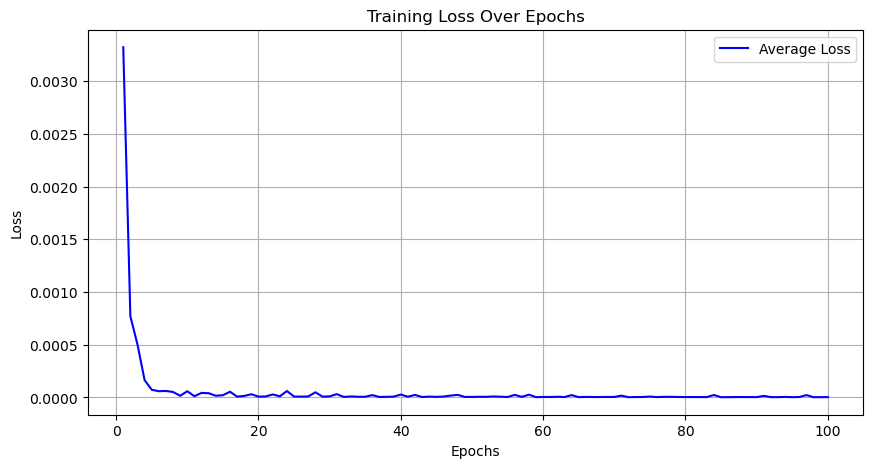

In [5]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
LEARNING_RATE = 0.001
NUM_EPOCHS = 100
BATCH_SIZE = 32
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для сохранения модели

# Класс для загрузки данных
class TrajectoryDataset(Dataset):
    def __init__(self, directory):
        self.data = []
        self.load_data(directory)

    def load_data(self, directory):
        for filename in os.listdir(directory):
            if filename.endswith('.txt'):
                file_path = os.path.join(directory, filename)
                trajectory = np.loadtxt(file_path)
                for i in range(NUM_POINTS, len(trajectory)):
                    input_data = trajectory[i - NUM_POINTS:i]  # Используем последние NUM_POINTS точек
                    output_data = trajectory[i - NUM_POINTS - 1]  # Предсказываем предыдущую точку
                    self.data.append((input_data.flatten(), output_data))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0], dtype=torch.float32), torch.tensor(self.data[idx][1], dtype=torch.float32)

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))
        layers.append(nn.ReLU())
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Основной блок
def main(directory):
    # Создаем папку для модели, если она не существует
    os.makedirs('model_obr', exist_ok=True)

    # Загружаем данные
    dataset = TrajectoryDataset(directory)
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Инициализируем модель, оптимизатор и функцию потерь
    model = TrajectoryPredictor()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.MSELoss()

    best_loss = float('inf')  # Инициализируем лучшую потерю

    # Списки для хранения потерь для построения графиков
    epoch_losses = []

    # Обучение модели
    for epoch in range(NUM_EPOCHS):
        epoch_loss = 0.0  # Суммарная потеря за эпоху
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Средняя потеря за эпоху
        average_loss = epoch_loss / len(dataloader)
        epoch_losses.append(average_loss)  # Сохраняем для графика

        # Проверяем, нужно ли сохранять модель
        if average_loss < best_loss:
            best_loss = average_loss
            torch.save(model.state_dict(), MODEL_PATH)  # Сохраняем модель

            # Вычисляем среднюю ошибку по каждой координате
            with torch.no_grad():
                all_outputs = []
                all_targets = []
                for inputs, targets in dataloader:
                    outputs = model(inputs)
                    all_outputs.append(outputs)
                    all_targets.append(targets)

                all_outputs = torch.cat(all_outputs)
                all_targets = torch.cat(all_targets)

                # Вычисляем среднюю ошибку для каждой координаты
                coordinate_errors = torch.mean((all_outputs - all_targets) ** 2, dim=0)

            print(f'Модель сохранена на эпохе {epoch + 1} с потерей {average_loss:.4f}')
            print(f'Средняя ошибка по координатам: {coordinate_errors.numpy()}')

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{NUM_EPOCHS}], Average Loss: {average_loss:.4f}')

    print('Обучение завершено!')

    # Построение графика потерь
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, NUM_EPOCHS + 1), epoch_losses, label='Average Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid()
    plt.savefig('loss_plot.png')  # Сохранение графика
    plt.show()

# Запуск программы
if __name__ == '__main__':
    main('koord_new')  # Укажите путь к вашей папке с данными


# Обновлённая модель

Модель сохранена на эпохе 1 с потерей 0.0150
Средняя ошибка по координатам: [0.00673941 0.00650205 0.01014057 0.00674717]
Модель сохранена на эпохе 2 с потерей 0.0070
Средняя ошибка по координатам: [0.00588555 0.00591223 0.00705886 0.00679475]
Модель сохранена на эпохе 3 с потерей 0.0060
Средняя ошибка по координатам: [0.00465309 0.00479314 0.00628309 0.00484874]
Модель сохранена на эпохе 4 с потерей 0.0056
Средняя ошибка по координатам: [0.00472424 0.00481883 0.00665848 0.00534766]
Модель сохранена на эпохе 5 с потерей 0.0049
Средняя ошибка по координатам: [0.0041625  0.00428547 0.00520705 0.00451328]
Модель сохранена на эпохе 6 с потерей 0.0046
Средняя ошибка по координатам: [0.0039391  0.00396558 0.00512041 0.00452048]
Модель сохранена на эпохе 7 с потерей 0.0044
Средняя ошибка по координатам: [0.00374613 0.00381067 0.00420236 0.00394415]
Модель сохранена на эпохе 8 с потерей 0.0042
Средняя ошибка по координатам: [0.00375404 0.00380811 0.00475562 0.00411893]
Модель сохранена на эпох

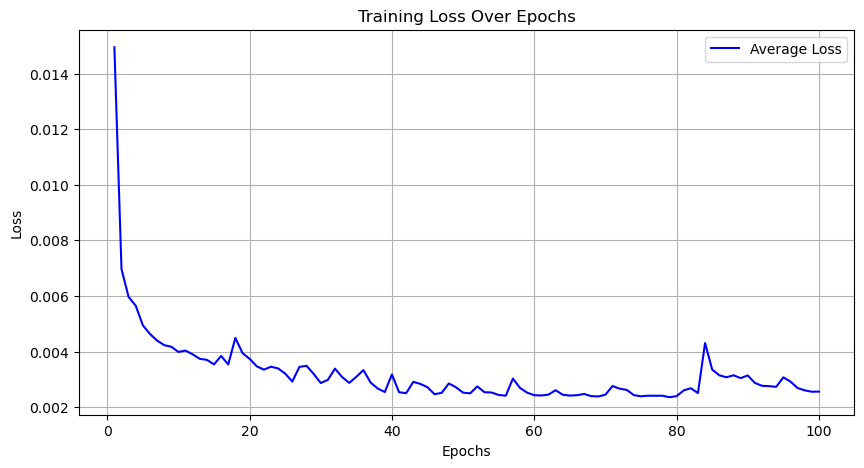

In [20]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_LAYERS = 3  # Число рекуррентных слоев
LEARNING_RATE = 0.001
NUM_EPOCHS = 100
BATCH_SIZE = 32
MODEL_PATH = 'model_new/model.pth'  # Путь для сохранения модели

# Класс для загрузки данных
class TrajectoryDataset(Dataset):
    def __init__(self, directory):
        self.data = []
        self.load_data(directory)

    def load_data(self, directory):
        for filename in os.listdir(directory):
            if filename.endswith('.txt'):
                file_path = os.path.join(directory, filename)
                trajectory = np.loadtxt(file_path)
                for i in range(NUM_POINTS, len(trajectory)):
                    input_data = trajectory[i - NUM_POINTS:i]  # Последние NUM_POINTS точек
                    output_data = trajectory[i - NUM_POINTS - 1]  # Предсказываем текущую точку
                    self.data.append((input_data, output_data))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0], dtype=torch.float32), torch.tensor(self.data[idx][1], dtype=torch.float32)

# Улучшенная рекуррентная модель
class EnhancedTrajectoryPredictorRNN(nn.Module):
    def __init__(self):
        super(EnhancedTrajectoryPredictorRNN, self).__init__()
        # Проекция входных данных в скрытое пространство
        self.input_projection = nn.Linear(INPUT_SIZE, HIDDEN_SIZE)
        # Рекуррентные слои LSTM с Dropout между слоями
        self.lstm = nn.LSTM(HIDDEN_SIZE, HIDDEN_SIZE, NUM_LAYERS, batch_first=True, dropout=0.3)
        # Batch Normalization для выхода LSTM
        self.batch_norm = nn.BatchNorm1d(HIDDEN_SIZE)
        # Остаточная связь с проекцией
        self.residual_connection = nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE)
        # Полносвязный слой для вывода
        self.fc = nn.Sequential(
            nn.Linear(HIDDEN_SIZE, 64),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout перед выходным слоем
            nn.Linear(64, OUTPUT_SIZE)
        )
    def forward(self, x):
        # Проекция входных данных
        x_proj = self.input_projection(x)  # (batch_size, NUM_POINTS, HIDDEN_SIZE)
        # Прогон через LSTM
        lstm_out, _ = self.lstm(x_proj)  # (batch_size, NUM_POINTS, HIDDEN_SIZE)
        # Берём выход последнего временного шага
        last_out = lstm_out[:, -1, :]  # (batch_size, HIDDEN_SIZE)
        # Batch Normalization
        last_out = self.batch_norm(last_out)
        # Добавляем остаточную связь
        residual_out = last_out + self.residual_connection(last_out)
        # Прогон через полносвязный слой
        output = self.fc(residual_out)

        return output

# Основной блок
def main(directory):
    # Создаем папку для модели, если она не существует
    os.makedirs('model_new', exist_ok=True)

    # Загружаем данные
    dataset = TrajectoryDataset(directory)
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Инициализируем модель, оптимизатор и функцию потерь
    model = EnhancedTrajectoryPredictorRNN()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.MSELoss()

    best_loss = float('inf')  # Инициализируем лучшую потерю

    # Списки для хранения потерь для построения графиков
    epoch_losses = []

    # Обучение модели
    for epoch in range(NUM_EPOCHS):
        epoch_loss = 0.0  # Суммарная потеря за эпоху
        for inputs, targets in dataloader:
            # Добавляем измерение времени для рекуррентной сети
            inputs = inputs.view(-1, NUM_POINTS, INPUT_SIZE)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Средняя потеря за эпоху
        average_loss = epoch_loss / len(dataloader)
        epoch_losses.append(average_loss)  # Сохраняем для графика

        # Проверяем, нужно ли сохранять модель
        if average_loss < best_loss:
            best_loss = average_loss
            torch.save(model.state_dict(), MODEL_PATH)  # Сохраняем модель

            # Вычисляем среднюю ошибку по каждой координате
            with torch.no_grad():
                all_outputs = []
                all_targets = []
                for inputs, targets in dataloader:
                    inputs = inputs.view(-1, NUM_POINTS, INPUT_SIZE)
                    outputs = model(inputs)
                    all_outputs.append(outputs)
                    all_targets.append(targets)

                all_outputs = torch.cat(all_outputs)
                all_targets = torch.cat(all_targets)

                # Вычисляем среднюю ошибку для каждой координаты
                coordinate_errors = torch.mean((all_outputs - all_targets) ** 2, dim=0)

            print(f'Модель сохранена на эпохе {epoch + 1} с потерей {average_loss:.4f}')
            print(f'Средняя ошибка по координатам: {coordinate_errors.numpy()}')

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{NUM_EPOCHS}], Average Loss: {average_loss:.4f}')

    print('Обучение завершено!')

    # Построение графика потерь
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, NUM_EPOCHS + 1), epoch_losses, label='Average Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid()
    plt.savefig('loss_plot.png')  # Сохранение графика
    plt.show()

# Запуск программы
if __name__ == '__main__':
    main('koord_new')  # Укажите путь к вашей папке с данными


# Новые предсказания


C:\Users\PC1\AppData\Local\Temp\ipykernel_15620\2062200003.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем ве


Точки из середины файла (t, x, y, z):
[[0.47787611 0.49451526 0.99938467 0.23003328]
 [0.48672566 0.50335611 1.         0.2385954 ]
 [0.49557522 0.51218677 1.         0.24733084]
 [0.50442478 0.52100742 0.99938215 0.25620494]
 [0.51327434 0.529818   0.99814897 0.26525236]
 [0.52212389 0.53861856 0.99630045 0.27443844]
 [0.53097345 0.54740917 0.99383661 0.28379784]
 [0.53982301 0.55618988 0.99075996 0.2932959 ]
 [0.54867257 0.56496076 0.98706798 0.30296728]]

Предсказанное значение (t, x, y, z):
[[0.47267312 0.48622632 0.9964449  0.22346196]]
Точка до выбранных 9 точек (t, x, y, z):
[0.46902655 0.48566421 0.99814897 0.22160982]

Разница между предсказанными значениями и точкой до выбранных 9 точек:
t: 0.003646569441905112, x: 0.0005621067158804727, y: -0.0017040844505172847, z: 0.001852138814037535


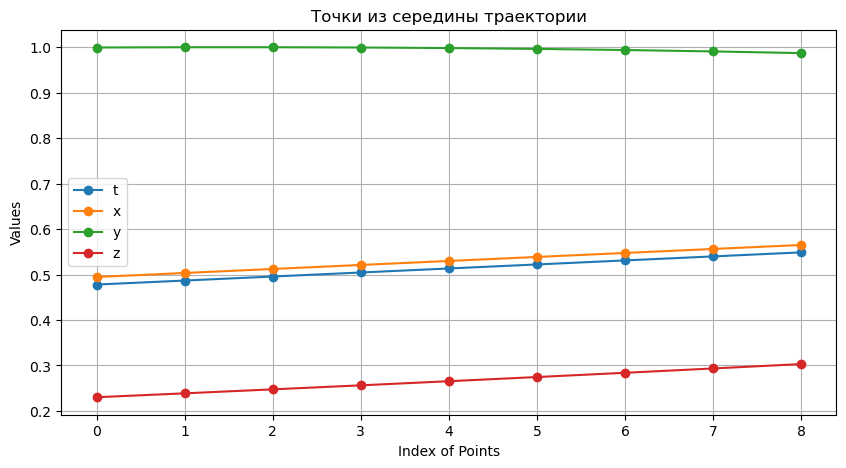

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torch.nn as nn

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Класс для загрузки данных
class TrajectoryDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0], dtype=torch.float32), torch.tensor(self.data[idx][1], dtype=torch.float32)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Основной блок
def main(file_path):
    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    prediction = predict_trajectory(model, input_data)
    print("\nПредсказанное значение (t, x, y, z):")
    print(prediction.numpy())
    print("Точка до выбранных 9 точек (t, x, y, z):")
    print(before_input)
    # Разница между предсказанным значением и точкой до выбранных 9 точек
    diff = prediction.squeeze().numpy() - before_input  # Сжимаем размерность и вычисляем разницу

    print(f"\nРазница между предсказанными значениями и точкой до выбранных 9 точек:")
    print(f"t: {diff[0]}, x: {diff[1]}, y: {diff[2]}, z: {diff[3]}")

    # Визуализация
    plt.figure(figsize=(10, 5))
    plt.plot(range(NUM_POINTS), input_data[:, 0], label='t', marker='o')
    plt.plot(range(NUM_POINTS), input_data[:, 1], label='x', marker='o')
    plt.plot(range(NUM_POINTS), input_data[:, 2], label='y', marker='o')
    plt.plot(range(NUM_POINTS), input_data[:, 3], label='z', marker='o')
    plt.xlabel('Index of Points')
    plt.ylabel('Values')
    plt.title('Точки из середины траектории')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 5.txt'  # Укажите путь к вашему файлу
    main(file_path)


# Графики по новым предсказаниям


Точки из середины файла (t, x, y, z):
[[0.47787611 0.49451526 0.99938467 0.23003328]
 [0.48672566 0.50335611 1.         0.2385954 ]
 [0.49557522 0.51218677 1.         0.24733084]
 [0.50442478 0.52100742 0.99938215 0.25620494]
 [0.51327434 0.529818   0.99814897 0.26525236]
 [0.52212389 0.53861856 0.99630045 0.27443844]
 [0.53097345 0.54740917 0.99383661 0.28379784]
 [0.53982301 0.55618988 0.99075996 0.2932959 ]
 [0.54867257 0.56496076 0.98706798 0.30296728]]

Предсказанное значение (t, x, y, z):
[[0.47267312 0.48622632 0.9964449  0.22346196]]
Точка до выбранных 9 точек (t, x, y, z):
[0.46902655 0.48566421 0.99814897 0.22160982]

Разница между предсказанными значениями и точкой до выбранных 9 точек:
t: 0.003646569441905112, x: 0.0005621067158804727, y: -0.0017040844505172847, z: 0.001852138814037535


C:\Users\PC1\AppData\Local\Temp\ipykernel_15620\461242271.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем вес

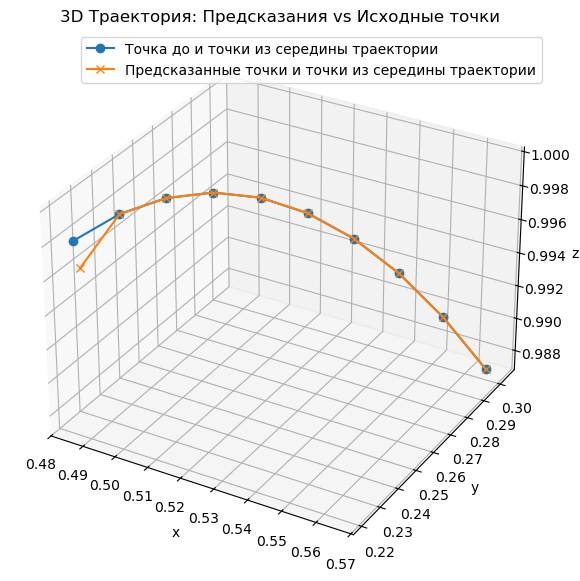

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torch.nn as nn
from mpl_toolkits.mplot3d import Axes3D  # Для 3D графиков

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Класс для загрузки данных
class TrajectoryDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0], dtype=torch.float32), torch.tensor(self.data[idx][1], dtype=torch.float32)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Основной блок
def main(file_path):
    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    prediction = predict_trajectory(model, input_data)
    print("\nПредсказанное значение (t, x, y, z):")
    print(prediction.numpy())

    print("Точка до выбранных 9 точек (t, x, y, z):")
    print(before_input)

    # Разница между предсказанным значением и точкой до выбранных 9 точек
    diff = prediction.squeeze().numpy() - before_input  # Сжимаем размерность и вычисляем разницу

    print(f"\nРазница между предсказанными значениями и точкой до выбранных 9 точек:")
    print(f"t: {diff[0]}, x: {diff[1]}, y: {diff[2]}, z: {diff[3]}")

    # Извлекаем только координаты x, y, z из предсказания
    predicted_values = prediction.squeeze().numpy()[1:]  # Оставляем только x, y, z, без t

    # Визуализация
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Точки из середины и линия, начинающаяся с точки до выбранных
    # Мы добавляем точку before_input как первую для линии
    x_line1 = np.concatenate(([before_input[1]], input_data[:, 1]))  # x
    y_line1 = np.concatenate(([before_input[2]], input_data[:, 2]))  # y
    z_line1 = np.concatenate(([before_input[3]], input_data[:, 3]))  # z

    # Линия, начинающаяся с предсказанного значения
    x_line2 = np.concatenate(([predicted_values[0]], input_data[:, 1]))  # x
    y_line2 = np.concatenate(([predicted_values[1]], input_data[:, 2]))  # y
    z_line2 = np.concatenate(([predicted_values[2]], input_data[:, 3]))  # z

    # Построение линий
    ax.plot(x_line1, z_line1, y_line1, label='Точка до и точки из середины траектории', marker='o')
    ax.plot(x_line2, z_line2, y_line2, label='Предсказанные точки и точки из середины траектории', marker='x')

    # Настройки графика
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('3D Траектория: Предсказания vs Исходные точки')

    ax.legend()
    plt.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 5.txt'  # Укажите путь к вашему файлу
    main(file_path)


# другой вид 3д графика

In [3]:
import os
import numpy as np
import torch
import plotly.graph_objs as go
import torch.nn as nn
import plotly.io as pio

# Устанавливаем рендеринг в браузер
pio.renderers.default = 'browser'  # Это заставит график открыться в браузере

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Основной блок
def main(file_path):
    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    prediction = predict_trajectory(model, input_data)
    print("\nПредсказанное значение (t, x, y, z):")
    print(prediction.numpy())

    print("Точка до выбранных 9 точек (t, x, y, z):")
    print(before_input)

    # Разница между предсказанным значением и точкой до выбранных 9 точек
    diff = prediction.squeeze().numpy() - before_input  # Сжимаем размерность и вычисляем разницу

    print(f"\nРазница между предсказанными значениями и точкой до выбранных 9 точек:")
    print(f"t: {diff[0]}, x: {diff[1]}, y: {diff[2]}, z: {diff[3]}")

    # Извлекаем только координаты x, y, z из предсказания
    predicted_values = prediction.squeeze().numpy()[1:]  # Оставляем только x, y, z, без t

    # Построение 3D графика с использованием plotly
    trace1 = go.Scatter3d(
        x=np.concatenate(([before_input[1]], input_data[:, 1])),  # x
        y=np.concatenate(([before_input[3]], input_data[:, 3])),  # z (меняем с y)
        z=np.concatenate(([before_input[2]], input_data[:, 2])),  # y (меняем с z)
        mode='lines+markers',
        name='Точка до и точки из середины траектории',
        marker=dict(size=5, color='blue')
    )

    trace2 = go.Scatter3d(
        x=np.concatenate(([predicted_values[0]], input_data[:, 1])),  # x
        y=np.concatenate(([predicted_values[2]], input_data[:, 3])),  # z (меняем с y)
        z=np.concatenate(([predicted_values[1]], input_data[:, 2])),  # y (меняем с z)
        mode='lines+markers',
        name='Предсказанные точки и точки из середины траектории',
        marker=dict(size=5, color='red')
    )

    data = [trace1, trace2]

    layout = go.Layout(
        title='3D Траектория: Предсказания vs Исходные точки',
        scene=dict(
            xaxis=dict(title='x'),
            yaxis=dict(title='z'),  # Заменили y на z
            zaxis=dict(title='y')   # Заменили z на y
        ),
        legend=dict(x=0, y=1),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 5.txt'  # Укажите путь к вашему файлу
    main(file_path)


C:\Users\PC1\AppData\Local\Temp\ipykernel_15620\4156519894.py:51: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.




Точки из середины файла (t, x, y, z):
[[0.47787611 0.49451526 0.99938467 0.23003328]
 [0.48672566 0.50335611 1.         0.2385954 ]
 [0.49557522 0.51218677 1.         0.24733084]
 [0.50442478 0.52100742 0.99938215 0.25620494]
 [0.51327434 0.529818   0.99814897 0.26525236]
 [0.52212389 0.53861856 0.99630045 0.27443844]
 [0.53097345 0.54740917 0.99383661 0.28379784]
 [0.53982301 0.55618988 0.99075996 0.2932959 ]
 [0.54867257 0.56496076 0.98706798 0.30296728]]

Предсказанное значение (t, x, y, z):
[[0.47267312 0.48622632 0.9964449  0.22346196]]
Точка до выбранных 9 точек (t, x, y, z):
[0.46902655 0.48566421 0.99814897 0.22160982]

Разница между предсказанными значениями и точкой до выбранных 9 точек:
t: 0.003646569441905112, x: 0.0005621067158804727, y: -0.0017040844505172847, z: 0.001852138814037535


# Предсказывает сразу несколько точек

In [4]:
import os
import numpy as np
import torch
import plotly.graph_objs as go
import torch.nn as nn
import plotly.io as pio

# Устанавливаем рендеринг в браузер
pio.renderers.default = 'browser'  # Это заставит график открыться в браузере

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
NUM_PREDICTIONS = 110  # Количество точек для предсказания (это теперь можно изменять)
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Основной блок
def main(file_path):
    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    predictions = []
    current_input = input_data  # Начинаем с текущих точек
    for _ in range(NUM_PREDICTIONS):  # Предсказать NUM_PREDICTIONS точек
        prediction = predict_trajectory(model, current_input)
        predictions.append(prediction.squeeze().numpy())  # Сохраняем полные предсказания (включая t, x, y, z)
        
        # Обновляем current_input: добавляем предсказанную точку в начало и удаляем последнюю
        new_point = prediction.squeeze().numpy()  # Точка с полными данными (t, x, y, z)
        current_input = np.vstack([new_point, current_input[:-1]])  # Сдвигаем и добавляем предсказанную точку

    # Печатаем предсказания
    print("\nПредсказанные точки (t, x, y, z):")
    for i, pred in enumerate(predictions):
        print(f"Точка {i+1}: {pred}")

    # Правильные точки (предыдущие NUM_PREDICTIONS точек)
    # Проверяем, сколько точек доступно для правильных точек
    correct_num_points = min(NUM_PREDICTIONS, start_idx)  # Ограничиваем числом доступных точек
    correct_values = trajectory[start_idx - correct_num_points: start_idx, 1:]  # Берём NUM_PREDICTIONS предыдущих точек

    # Печатаем правильные точки
    print("\nПравильные точки (t, x, y, z):")
    for i, correct in enumerate(correct_values):
        print(f"Правильная точка {i+1}: {correct}")

    # Построение 3D графика с использованием plotly
    # Исходные точки (включая точку до выбранных)
    trace1 = go.Scatter3d(
        x=np.concatenate(([before_input[1]], input_data[:, 1])),  # x
        y=np.concatenate(([before_input[3]], input_data[:, 3])),  # z (меняем с y)
        z=np.concatenate(([before_input[2]], input_data[:, 2])),  # y (меняем с z)
        mode='lines+markers',
        name='Заданные точки',
        marker=dict(size=5, color='blue')
    )

    # Предсказанные точки (t, x, y, z)
    pred_values = np.array(predictions)
    trace2 = go.Scatter3d(
        x=pred_values[:, 1],  # x
        y=pred_values[:, 3],  # z (меняем с y)
        z=pred_values[:, 2],  # y (меняем с z)
        mode='lines+markers',
        name='Предсказанные точки',
        marker=dict(size=5, color='red')
    )

    # Правильные точки (предыдущие NUM_PREDICTIONS точек)
    trace3 = go.Scatter3d(
        x=correct_values[:, 0],  # x
        y=correct_values[:, 2],  # z (меняем с y)
        z=correct_values[:, 1],  # y (меняем с z)
        mode='lines+markers',
        name='Правильные точки',
        marker=dict(size=5, color='green')
    )

    data = [trace1, trace2, trace3]

    layout = go.Layout(
        title='3D Траектория: Предсказанные vs Правильные точки',
        scene=dict(
            xaxis=dict(title='x'),
            yaxis=dict(title='z'),  # Заменили y на z
            zaxis=dict(title='y')   # Заменили z на y
        ),
        legend=dict(x=0, y=1),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 5.txt'  # Укажите путь к вашему файлу
    main(file_path)



Точки из середины файла (t, x, y, z):
[[0.47787611 0.49451526 0.99938467 0.23003328]
 [0.48672566 0.50335611 1.         0.2385954 ]
 [0.49557522 0.51218677 1.         0.24733084]
 [0.50442478 0.52100742 0.99938215 0.25620494]
 [0.51327434 0.529818   0.99814897 0.26525236]
 [0.52212389 0.53861856 0.99630045 0.27443844]
 [0.53097345 0.54740917 0.99383661 0.28379784]
 [0.53982301 0.55618988 0.99075996 0.2932959 ]
 [0.54867257 0.56496076 0.98706798 0.30296728]]

Предсказанные точки (t, x, y, z):
Точка 1: [0.47267312 0.48622632 0.9964449  0.22346196]
Точка 2: [0.46401784 0.47782263 0.9943343  0.21554562]
Точка 3: [0.45511886 0.46905127 0.9916187  0.20757201]
Точка 4: [0.44661725 0.46069285 0.9885268  0.20020688]
Точка 5: [0.43819648 0.45238227 0.98445034 0.19318634]
Точка 6: [0.42989832 0.4442     0.98015785 0.18628892]
Точка 7: [0.42164028 0.43607926 0.97552437 0.1795522 ]
Точка 8: [0.41355404 0.4281396  0.97075677 0.17299831]
Точка 9: [0.40530717 0.41984275 0.9647823  0.16641584]
Точка 1

C:\Users\PC1\AppData\Local\Temp\ipykernel_15620\868026400.py:52: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# График,где количество точек опредляется автоматически

In [7]:
import os
import numpy as np
import torch
import plotly.graph_objs as go
import torch.nn as nn
import plotly.io as pio

# Устанавливаем рендеринг в браузер
pio.renderers.default = 'browser'  # Это заставит график открыться в браузере

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Основной блок
def main(file_path):
    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    predictions = []
    current_input = input_data  # Начинаем с текущих точек
    while True:  # Будем предсказывать, пока не встретим y <= 0
        prediction = predict_trajectory(model, current_input)
        predictions.append(prediction.squeeze().numpy())  # Сохраняем полные предсказания (включая t, x, y, z)
        
        # Проверяем координату y в последней предсказанной точке
        if prediction.squeeze().numpy()[2] <= 0:  # Если y <= 0, прекращаем предсказания
            break
        
        # Обновляем current_input: добавляем предсказанную точку в начало и удаляем последнюю
        new_point = prediction.squeeze().numpy()  # Точка с полными данными (t, x, y, z)
        current_input = np.vstack([new_point, current_input[:-1]])  # Сдвигаем и добавляем предсказанную точку

    # Убираем последнюю точку из предсказаний (которая была сделана, когда y <= 0)
    predictions.pop()  # Удаляем последнюю точку, если y <= 0

    # Печатаем предсказания
    print("\nПредсказанные точки (t, x, y, z):")
    for i, pred in enumerate(predictions):
        print(f"Точка {i+1}: {pred}")

    # Правильные точки (предыдущие NUM_PREDICTIONS точек)
    # Проверяем, сколько точек доступно для правильных точек
    correct_num_points = min(len(predictions), start_idx)  # Ограничиваем числом доступных точек
    correct_values = trajectory[start_idx - correct_num_points: start_idx, 1:]  # Берём предыдущие правильные точки

    # Печатаем правильные точки
    print("\nПравильные точки (t, x, y, z):")
    for i, correct in enumerate(correct_values):
        print(f"Правильная точка {i+1}: {correct}")

    # Построение 3D графика с использованием plotly
    # Исходные точки (включая точку до выбранных)
    trace1 = go.Scatter3d(
        x=np.concatenate(([before_input[1]], input_data[:, 1])),  # x
        y=np.concatenate(([before_input[3]], input_data[:, 3])),  # z (меняем с y)
        z=np.concatenate(([before_input[2]], input_data[:, 2])),  # y (меняем с z)
        mode='lines+markers',
        name='Заданные точки',
        marker=dict(size=5, color='blue')
    )

    # Предсказанные точки (t, x, y, z)
    pred_values = np.array(predictions)
    trace2 = go.Scatter3d(
        x=pred_values[:, 1],  # x
        y=pred_values[:, 3],  # z (меняем с y)
        z=pred_values[:, 2],  # y (меняем с z)
        mode='lines+markers',
        name='Предсказанные точки',
        marker=dict(size=5, color='red')
    )

    # Правильные точки (предыдущие NUM_PREDICTIONS точек)
    trace3 = go.Scatter3d(
        x=correct_values[:, 0],  # x
        y=correct_values[:, 2],  # z (меняем с y)
        z=correct_values[:, 1],  # y (меняем с z)
        mode='lines+markers',
        name='Правильные точки',
        marker=dict(size=5, color='green')
    )

    data = [trace1, trace2, trace3]

    layout = go.Layout(
        title='3D Траектория: Предсказанные vs Правильные точки',
        scene=dict(
            xaxis=dict(title='x'),
            yaxis=dict(title='z'),  # Заменили y на z
            zaxis=dict(title='y')   # Заменили z на y
        ),
        legend=dict(x=0, y=1),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 10.txt'  # Укажите путь к вашему файлу
    main(file_path)



Точки из середины файла (t, x, y, z):
[[0.48821887 0.51601238 1.         0.24090443]
 [0.49278166 0.5205567  0.99996892 0.2454228 ]
 [0.49734445 0.52509659 0.999773   0.24997882]
 [0.50190725 0.52963204 0.99941156 0.25458191]
 [0.50647004 0.53416307 0.99888527 0.25922265]
 [0.51103283 0.53868967 0.99819414 0.26390105]
 [0.51559563 0.54321185 0.99733884 0.26862651]
 [0.52015842 0.54772965 0.99631869 0.27338962]
 [0.52472121 0.55224307 0.9951337  0.27819981]]

Предсказанные точки (t, x, y, z):
Точка 1: [0.48403192 0.51049024 0.99925405 0.23772898]
Точка 2: [0.47959173 0.505953   0.9985506  0.23348144]
Точка 3: [0.47495282 0.50124186 0.9975082  0.22917408]
Точка 4: [0.4703449  0.4965115  0.9963265  0.22493926]
Точка 5: [0.46563107 0.49161386 0.9950303  0.22068208]
Точка 6: [0.46087188 0.48662305 0.9934148  0.21636221]
Точка 7: [0.45603    0.48148713 0.9916501  0.21205148]
Точка 8: [0.45128697 0.4764268  0.9899669  0.20778173]
Точка 9: [0.44642088 0.47112012 0.9881806  0.2034091 ]
Точка 1

C:\Users\PC1\AppData\Local\Temp\ipykernel_15620\3527211152.py:51: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Разнормированные данные

In [8]:
import os
import numpy as np
import torch
import plotly.graph_objs as go
import torch.nn as nn
import plotly.io as pio

# Устанавливаем рендеринг в браузер
pio.renderers.default = 'browser'  # Это заставит график открыться в браузере

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Функция для чтения коэффициентов из max_values.txt
def read_max_values(file_path):
    max_values = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.split(":")
            if len(parts) == 2:
                file_name = parts[0].strip()
                values = list(map(float, parts[1].split()))
                max_values[file_name] = values
    return max_values

# Основной блок
def main(file_path):
    # Читаем коэффициенты для масштабирования
    max_values = read_max_values('max_values.txt')

    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    predictions = []
    current_input = input_data  # Начинаем с текущих точек
    while True:  # Будем предсказывать, пока не встретим y <= 0
        prediction = predict_trajectory(model, current_input)
        predictions.append(prediction.squeeze().numpy())  # Сохраняем полные предсказания (включая t, x, y, z)
        
        # Проверяем координату y в последней предсказанной точке
        if prediction.squeeze().numpy()[2] <= 0:  # Если y <= 0, прекращаем предсказания
            break
        
        # Обновляем current_input: добавляем предсказанную точку в начало и удаляем последнюю
        new_point = prediction.squeeze().numpy()  # Точка с полными данными (t, x, y, z)
        current_input = np.vstack([new_point, current_input[:-1]])  # Сдвигаем и добавляем предсказанную точку

    # Убираем последнюю точку из предсказаний (которая была сделана, когда y <= 0)
    predictions.pop()  # Удаляем последнюю точку, если y <= 0

    # Печатаем предсказания
    print("\nПредсказанные точки (t, x, y, z):")
    for i, pred in enumerate(predictions):
        print(f"Точка {i+1}: {pred}")

    # Получаем коэффициенты для масштабирования, исходя из имени файла
    file_name = os.path.basename(file_path)
    if file_name in max_values:
        scaling_factors = max_values[file_name]
    else:
        raise ValueError(f"Не найден коэффициент для файла: {file_name}")

    # Проверяем количество коэффициентов в scaling_factors
    if len(scaling_factors) < 4:
        scaling_factors.append(1.0)  # Добавляем коэффициент для t, если его нет

    # Масштабируем предсказания (умножаем на коэффициенты для t, x, y, z)
    scaled_predictions = np.array(predictions)
    scaled_predictions[:, 0] = scaled_predictions[:, 0] * scaling_factors[0]  # Масштабируем t
    scaled_predictions[:, 1:] = scaled_predictions[:, 1:] * scaling_factors[1:]  # Масштабируем x, y, z

    # Печатаем масштабированные предсказанные точки
    print("\nМасштабированные предсказанные точки (t, x, y, z):")
    for i, pred in enumerate(scaled_predictions):
        print(f"Масштабированная точка {i+1}: {pred}")

    # Масштабируем исходные точки
    scaled_input_data = input_data.copy()
    scaled_input_data[:, 0] = scaled_input_data[:, 0] * scaling_factors[0]  # Масштабируем t
    scaled_input_data[:, 1:] = scaled_input_data[:, 1:] * scaling_factors[1:]  # Масштабируем x, y, z
    scaled_before_input = before_input * scaling_factors

    # Правильные точки (предыдущие NUM_PREDICTIONS точек)
    correct_num_points = min(len(scaled_predictions), start_idx)  # Ограничиваем числом доступных точек
    correct_values = trajectory[start_idx - correct_num_points: start_idx, 1:]  # Берём предыдущие правильные точки

    # Масштабируем правильные точки (используем только первые три коэффициента для x, y, z)
    scaled_correct_values = correct_values * scaling_factors[1:]  # Масштабируем только x, y, z

    # Печатаем правильные точки
    print("\nПравильные точки (t, x, y, z):")
    for i, correct in enumerate(scaled_correct_values):
        print(f"Правильная точка {i+1}: {correct}")

    # Построение 3D графика с использованием plotly
    # Исходные точки (включая точку до выбранных)
    trace1 = go.Scatter3d(
        x=np.concatenate(([scaled_before_input[1]], scaled_input_data[:, 1])),  # x
        y=np.concatenate(([scaled_before_input[3]], scaled_input_data[:, 3])),  # z (меняем с y)
        z=np.concatenate(([scaled_before_input[2]], scaled_input_data[:, 2])),  # y (меняем с z)
        mode='lines+markers',
        name='Заданные точки',
        marker=dict(size=5, color='blue')
    )

    # Предсказанные точки (t, x, y, z)
    trace2 = go.Scatter3d(
        x=scaled_predictions[:, 1],  # x
        y=scaled_predictions[:, 3],  # z (меняем с y)
        z=scaled_predictions[:, 2],  # y (меняем с z)
        mode='lines+markers',
        name='Предсказанные точки',
        marker=dict(size=5, color='red')
    )

    # Правильные точки
    trace3 = go.Scatter3d(
        x=scaled_correct_values[:, 0],  # x
        y=scaled_correct_values[:, 2],  # z (меняем с y)
        z=scaled_correct_values[:, 1],  # y (меняем с z)
        mode='lines+markers',
        name='Правильные точки',
        marker=dict(size=5, color='green')
    )

    # Строим график
    fig = go.Figure(data=[trace1, trace2, trace3])
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Z',  # z-координата по оси Y
            zaxis_title='Y'   # y-координата по оси Z
        ),
        title=file_path
    )
    fig.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 20.txt'  # Укажите путь к вашему файлу
    main(file_path)


C:\Users\PC1\AppData\Local\Temp\ipykernel_15620\4027575556.py:66: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.




Точки из середины файла (t, x, y, z):
[[0.49377745 0.53771937 0.99966672 0.24744645]
 [0.49617442 0.54009339 0.99946929 0.24987107]
 [0.4985714  0.54246549 0.99922652 0.2523065 ]
 [0.50096838 0.54483569 0.99893821 0.25475542]
 [0.50336536 0.54720398 0.99860437 0.25721514]
 [0.50576233 0.54957035 0.99822519 0.25968566]
 [0.50815931 0.55193484 0.99780066 0.26216969]
 [0.51055629 0.55429741 0.99733079 0.26466181]
 [0.51295327 0.55665811 0.99681557 0.26717013]]

Предсказанные точки (t, x, y, z):
Точка 1: [0.4928659  0.5342017  0.9967503  0.24651515]
Точка 2: [0.49092168 0.5321364  0.99613476 0.24462986]
Точка 3: [0.48890096 0.52994746 0.99545646 0.24265459]
Точка 4: [0.48706394 0.52811164 0.99465597 0.24095684]
Точка 5: [0.48512942 0.5262396  0.9938179  0.23938504]
Точка 6: [0.48333296 0.5244846  0.99271035 0.23787734]
Точка 7: [0.48159915 0.5227732  0.9917429  0.2364783 ]
Точка 8: [0.47986922 0.52127266 0.99079233 0.23505121]
Точка 9: [0.47783875 0.5192546  0.9901044  0.23342785]
Точка 1

# Правильные графики

In [11]:
import os
import numpy as np
import torch
import plotly.graph_objs as go
import torch.nn as nn
import plotly.io as pio

# Устанавливаем рендеринг в браузер
pio.renderers.default = 'browser'  # Это заставит график открыться в браузере

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Функция для чтения коэффициентов из max_values.txt
def read_max_values(file_path):
    max_values = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.split(":")
            if len(parts) == 2:
                file_name = parts[0].strip()
                values = list(map(float, parts[1].split()))
                max_values[file_name] = values
    return max_values

# Основной блок
def main(file_path):
    # Читаем коэффициенты для масштабирования
    max_values = read_max_values('max_values.txt')

    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала и конца середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    predictions = []
    current_input = input_data  # Начинаем с текущих точек
    while True:  # Будем предсказывать, пока не встретим y <= 0
        prediction = predict_trajectory(model, current_input)
        predictions.append(prediction.squeeze().numpy())  # Сохраняем полные предсказания (включая t, x, y, z)
        
        # Проверяем координату y в последней предсказанной точке
        if prediction.squeeze().numpy()[2] <= 0:  # Если y <= 0, прекращаем предсказания
            break
        
        # Обновляем current_input: добавляем предсказанную точку в начало и удаляем последнюю
        new_point = prediction.squeeze().numpy()  # Точка с полными данными (t, x, y, z)
        current_input = np.vstack([new_point, current_input[:-1]])  # Сдвигаем и добавляем предсказанную точку

    # Убираем последнюю точку из предсказаний (которая была сделана, когда y <= 0)
    predictions.pop()  # Удаляем последнюю точку, если y <= 0

    # Печатаем предсказания
    print("\nПредсказанные точки (t, x, y, z):")
    for i, pred in enumerate(predictions):
        print(f"Точка {i+1}: {pred}")

    # Получаем коэффициенты для масштабирования, исходя из имени файла
    file_name = os.path.basename(file_path)
    if file_name in max_values:
        scaling_factors = max_values[file_name]
    else:
        raise ValueError(f"Не найден коэффициент для файла: {file_name}")

    # Проверяем количество коэффициентов в scaling_factors
    if len(scaling_factors) < 4:
        scaling_factors.append(1.0)  # Добавляем коэффициент для t, если его нет

    # Масштабируем предсказания (умножаем на коэффициенты для t, x, y, z)
    scaled_predictions = np.array(predictions)
    scaled_predictions[:, 0] = scaled_predictions[:, 0] * scaling_factors[0]  # Масштабируем t
    scaled_predictions[:, 1:] = scaled_predictions[:, 1:] * scaling_factors[1:]  # Масштабируем x, y, z

    # Печатаем масштабированные предсказанные точки
    print("\nМасштабированные предсказанные точки (t, x, y, z):")
    for i, pred in enumerate(scaled_predictions):
        print(f"Масштабированная точка {i+1}: {pred}")

    # Масштабируем исходные точки
    scaled_input_data = input_data.copy()
    scaled_input_data[:, 0] = scaled_input_data[:, 0] * scaling_factors[0]  # Масштабируем t
    scaled_input_data[:, 1:] = scaled_input_data[:, 1:] * scaling_factors[1:]  # Масштабируем x, y, z
    scaled_before_input = before_input * scaling_factors

    # Исключаем "заданные точки" (в диапазоне от start_idx до end_idx) из всех точек для correct_values
    correct_values = np.delete(trajectory, slice(start_idx, end_idx), axis=0)  # Удаляем строки с заданными точками

    # Масштабируем правильные точки (используем только первые три коэффициента для x, y, z)
    scaled_correct_values = correct_values[:, 1:] * scaling_factors[1:]  # Масштабируем только x, y, z

    # Печатаем правильные точки
    print("\nПравильные точки (t, x, y, z):")
    for i, correct in enumerate(scaled_correct_values):
        print(f"Правильная точка {i+1}: {correct}")

    # Построение 3D графика с использованием plotly
    # Исходные точки (включая точку до выбранных)
    trace1 = go.Scatter3d(
        x=np.concatenate(([scaled_before_input[1]], scaled_input_data[:, 1])),  # x
        y=np.concatenate(([scaled_before_input[3]], scaled_input_data[:, 3])),  # z (меняем с y)
        z=np.concatenate(([scaled_before_input[2]], scaled_input_data[:, 2])),  # y (меняем с z)
        mode='lines+markers',
        name='Заданные точки',
        marker=dict(size=5, color='blue')
    )

    # Предсказанные точки (t, x, y, z)
    trace2 = go.Scatter3d(
        x=scaled_predictions[:-1, 1],  # x
        y=scaled_predictions[:-1, 3],  # z (меняем с y)
        z=scaled_predictions[:-1, 2],  # y (меняем с z)
        mode='lines+markers',
        name='Предсказанные точки',
        marker=dict(size=5, color='red')
    )

    # Правильные точки
    trace3 = go.Scatter3d(
        x=scaled_correct_values[:, 0],  # x
        y=scaled_correct_values[:, 2],  # z (меняем с y)
        z=scaled_correct_values[:, 1],  # y (меняем с z)
        mode='lines+markers',
        name='Правильные точки',
        marker=dict(size=5, color='green')
    )

    # Строим график
    fig = go.Figure(data=[trace1, trace2, trace3])
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Z',  # z-координата по оси Y
            zaxis_title='Y'   # y-координата по оси Z
        ),
        title=file_path
    )
    fig.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 5.txt'  # Укажите путь к вашему файлу
    main(file_path)



Точки из середины файла (t, x, y, z):
[[0.47787611 0.49451526 0.99938467 0.23003328]
 [0.48672566 0.50335611 1.         0.2385954 ]
 [0.49557522 0.51218677 1.         0.24733084]
 [0.50442478 0.52100742 0.99938215 0.25620494]
 [0.51327434 0.529818   0.99814897 0.26525236]
 [0.52212389 0.53861856 0.99630045 0.27443844]
 [0.53097345 0.54740917 0.99383661 0.28379784]
 [0.53982301 0.55618988 0.99075996 0.2932959 ]
 [0.54867257 0.56496076 0.98706798 0.30296728]]

Предсказанные точки (t, x, y, z):
Точка 1: [0.47267312 0.48622632 0.9964449  0.22346196]
Точка 2: [0.46401784 0.47782263 0.9943343  0.21554562]
Точка 3: [0.45511886 0.46905127 0.9916187  0.20757201]
Точка 4: [0.44661725 0.46069285 0.9885268  0.20020688]
Точка 5: [0.43819648 0.45238227 0.98445034 0.19318634]
Точка 6: [0.42989832 0.4442     0.98015785 0.18628892]
Точка 7: [0.42164028 0.43607926 0.97552437 0.1795522 ]
Точка 8: [0.41355404 0.4281396  0.97075677 0.17299831]
Точка 9: [0.40530717 0.41984275 0.9647823  0.16641584]
Точка 1

C:\Users\PC1\AppData\Local\Temp\ipykernel_15620\1252980814.py:66: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# эксперементы с графиками

## Двигаю легенду ближе к графику

In [16]:
import os
import numpy as np
import torch
import plotly.graph_objs as go
import torch.nn as nn
import plotly.io as pio

# Устанавливаем рендеринг в браузер
pio.renderers.default = 'browser'  # Это заставит график открыться в браузере

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Функция для чтения коэффициентов из max_values.txt
def read_max_values(file_path):
    max_values = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.split(":")
            if len(parts) == 2:
                file_name = parts[0].strip()
                values = list(map(float, parts[1].split()))
                max_values[file_name] = values
    return max_values

# Основной блок
def main(file_path):
    # Читаем коэффициенты для масштабирования
    max_values = read_max_values('max_values.txt')

    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала и конца середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    predictions = []
    current_input = input_data  # Начинаем с текущих точек
    while True:  # Будем предсказывать, пока не встретим y <= 0
        prediction = predict_trajectory(model, current_input)
        predictions.append(prediction.squeeze().numpy())  # Сохраняем полные предсказания (включая t, x, y, z)
        
        # Проверяем координату y в последней предсказанной точке
        if prediction.squeeze().numpy()[2] <= 0:  # Если y <= 0, прекращаем предсказания
            break
        
        # Обновляем current_input: добавляем предсказанную точку в начало и удаляем последнюю
        new_point = prediction.squeeze().numpy()  # Точка с полными данными (t, x, y, z)
        current_input = np.vstack([new_point, current_input[:-1]])  # Сдвигаем и добавляем предсказанную точку

    # Убираем последнюю точку из предсказаний (которая была сделана, когда y <= 0)
    predictions.pop()  # Удаляем последнюю точку, если y <= 0

    # Печатаем предсказания
    print("\nПредсказанные точки (t, x, y, z):")
    for i, pred in enumerate(predictions):
        print(f"Точка {i+1}: {pred}")

    # Получаем коэффициенты для масштабирования, исходя из имени файла
    file_name = os.path.basename(file_path)
    if file_name in max_values:
        scaling_factors = max_values[file_name]
    else:
        raise ValueError(f"Не найден коэффициент для файла: {file_name}")

    # Проверяем количество коэффициентов в scaling_factors
    if len(scaling_factors) < 4:
        scaling_factors.append(1.0)  # Добавляем коэффициент для t, если его нет

    # Масштабируем предсказания (умножаем на коэффициенты для t, x, y, z)
    scaled_predictions = np.array(predictions)
    scaled_predictions[:, 0] = scaled_predictions[:, 0] * scaling_factors[0]  # Масштабируем t
    scaled_predictions[:, 1:] = scaled_predictions[:, 1:] * scaling_factors[1:]  # Масштабируем x, y, z

    # Печатаем масштабированные предсказанные точки
    print("\nМасштабированные предсказанные точки (t, x, y, z):")
    for i, pred in enumerate(scaled_predictions):
        print(f"Масштабированная точка {i+1}: {pred}")

    # Масштабируем исходные точки
    scaled_input_data = input_data.copy()
    scaled_input_data[:, 0] = scaled_input_data[:, 0] * scaling_factors[0]  # Масштабируем t
    scaled_input_data[:, 1:] = scaled_input_data[:, 1:] * scaling_factors[1:]  # Масштабируем x, y, z
    scaled_before_input = before_input * scaling_factors

    # Исключаем "заданные точки" (в диапазоне от start_idx до end_idx) из всех точек для correct_values
    correct_values = np.delete(trajectory, slice(start_idx, end_idx), axis=0)  # Удаляем строки с заданными точками

    # Масштабируем правильные точки (используем только первые три коэффициента для x, y, z)
    scaled_correct_values = correct_values[:, 1:] * scaling_factors[1:]  # Масштабируем только x, y, z

    # Печатаем правильные точки
    print("\nПравильные точки (t, x, y, z):")
    for i, correct in enumerate(scaled_correct_values):
        print(f"Правильная точка {i+1}: {correct}")

    # Построение 3D графика с использованием plotly
    # Исходные точки (включая точку до выбранных)
    trace1 = go.Scatter3d(
        x=np.concatenate(([scaled_before_input[1]], scaled_input_data[:, 1])),  # x
        y=np.concatenate(([scaled_before_input[3]], scaled_input_data[:, 3])),  # z (меняем с y)
        z=np.concatenate(([scaled_before_input[2]], scaled_input_data[:, 2])),  # y (меняем с z)
        mode='lines+markers',
        name='Заданные точки',
        marker=dict(size=5, color='blue')
    )

    # Предсказанные точки (t, x, y, z)
    trace2 = go.Scatter3d(
        x=scaled_predictions[:-1, 1],  # x
        y=scaled_predictions[:-1, 3],  # z (меняем с y)
        z=scaled_predictions[:-1, 2],  # y (меняем с z)
        mode='lines+markers',
        name='Предсказанные точки',
        marker=dict(size=5, color='red')
    )

    # Правильные точки
    trace3 = go.Scatter3d(
        x=scaled_correct_values[:, 0],  # x
        y=scaled_correct_values[:, 2],  # z (меняем с y)
        z=scaled_correct_values[:, 1],  # y (меняем с z)
        mode='lines+markers',
        name='Правильные точки',
        marker=dict(size=5, color='green')
    )

    # Строим график
    fig = go.Figure(data=[trace1, trace2, trace3])
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Z',  # z-координата по оси Y
            zaxis_title='Y'   # y-координата по оси Z
        ),
        title=file_path,
        legend=dict(
            x=0.75,  # Еще ближе к графику
            y=0.85,  # Еще ближе к графику
            xanchor='left',
            yanchor='top'
        )
    )
    fig.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 25.txt'  # Укажите путь к вашему файлу
    main(file_path)


C:\Users\PC1\AppData\Local\Temp\ipykernel_3372\3938183294.py:66: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.




Точки из середины файла (t, x, y, z):
[[0.49312765 0.54256092 0.99956606 0.24563036]
 [0.4950923  0.54450359 0.99938744 0.24762434]
 [0.49705695 0.54644483 0.99917824 0.24962751]
 [0.4990216  0.54838465 0.99893858 0.25163804]
 [0.50098626 0.55032303 0.99866833 0.25365776]
 [0.50295091 0.55226    0.99836763 0.25568301]
 [0.50491556 0.55419554 0.99803647 0.25771929]
 [0.50688021 0.55612965 0.99767497 0.25976109]
 [0.50884486 0.55806234 0.99728289 0.26181209]]

Предсказанные точки (t, x, y, z):
Точка 1: [0.49297708 0.5398671  0.9963694  0.24511304]
Точка 2: [0.4915403  0.53836954 0.99565536 0.243696  ]
Точка 3: [0.48999986 0.53671163 0.9949114  0.24216601]
Точка 4: [0.48866493 0.5354544  0.9940159  0.24096301]
Точка 5: [0.4872641  0.5341891  0.9930299  0.23989657]
Точка 6: [0.4860202  0.5330777  0.9918247  0.23892325]
Точка 7: [0.4848507  0.53203297 0.990747   0.23804924]
Точка 8: [0.4838249  0.53134537 0.98972124 0.2372446 ]
Точка 9: [0.48265904 0.5302921  0.989074   0.23629656]
Точка 1

### Графики проекций

In [4]:
import os
import numpy as np
import torch
import plotly.graph_objs as go
import torch.nn as nn
import plotly.io as pio

# Устанавливаем рендеринг в браузер
pio.renderers.default = 'browser'

# Параметры
NUM_POINTS = 9
INPUT_SIZE = 4
OUTPUT_SIZE = 4
HIDDEN_SIZE = 128
NUM_HIDDEN_LAYERS = 3
MODEL_PATH = 'model_na_norm/model.pth'

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))
        layers.append(nn.ReLU())
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания
def predict_trajectory(model, data):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)
        prediction = model(inputs)
    return prediction

# Функция для чтения коэффициентов
def read_max_values(file_path):
    max_values = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.split(":")
            if len(parts) == 2:
                file_name = parts[0].strip()
                values = list(map(float, parts[1].split()))
                max_values[file_name] = values
    return max_values

# Основной блок
def main(file_path):
    max_values = read_max_values('max_values.txt')
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()
    trajectory = np.loadtxt(file_path)
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    predictions = []
    current_input = input_data
    while True:
        prediction = predict_trajectory(model, current_input)
        predictions.append(prediction.squeeze().numpy())
        if prediction.squeeze().numpy()[2] <= 0:
            break
        new_point = prediction.squeeze().numpy()
        current_input = np.vstack([new_point, current_input[:-1]])

    predictions.pop()
    predictions.pop()  # Удаляем последнюю точку, при которой y <= 0
    file_name = os.path.basename(file_path)
    if file_name in max_values:
        scaling_factors = max_values[file_name]
    else:
        raise ValueError(f"Не найден коэффициент для файла: {file_name}")

    if len(scaling_factors) < 4:
        scaling_factors.append(1.0)

    scaled_predictions = np.array(predictions)
    scaled_predictions[:, 0] = scaled_predictions[:, 0] * scaling_factors[0]
    scaled_predictions[:, 1:] = scaled_predictions[:, 1:] * scaling_factors[1:]

    scaled_input_data = input_data.copy()
    scaled_input_data[:, 0] = scaled_input_data[:, 0] * scaling_factors[0]
    scaled_input_data[:, 1:] = scaled_input_data[:, 1:] * scaling_factors[1:]
    scaled_before_input = before_input * scaling_factors

    correct_values = np.delete(trajectory, slice(start_idx, end_idx), axis=0)
    scaled_correct_values = correct_values[:, 1:] * scaling_factors[1:]

    # Исключаем последнюю точку предсказаний при построении графика
    trace1 = go.Scatter(
        x=np.concatenate(([scaled_before_input[1]], scaled_input_data[:, 1])),  # x
        y=np.concatenate(([scaled_before_input[2]], scaled_input_data[:, 2])),  # y
        mode='lines+markers',
        name='Заданные точки',
        marker=dict(size=5, color='blue')
    )

    trace2 = go.Scatter(
        x=scaled_predictions[:, 1],  # x
        y=scaled_predictions[:, 2],  # y
        mode='lines+markers',
        name='Предсказанные точки',
        marker=dict(size=5, color='red')
    )

    trace3 = go.Scatter(
        x=scaled_correct_values[:, 0],  # x
        y=scaled_correct_values[:, 1],  # y
        mode='lines+markers',
        name='Правильные точки',
        marker=dict(size=5, color='green')
    )

    fig = go.Figure(data=[trace1, trace2, trace3])
    fig.update_layout(
        xaxis_title='X',
        yaxis_title='Y',
        title=file_path,
        legend=dict(x=0.75, y=0.85, xanchor='left', yanchor='top')
    )
    fig.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 5.txt'
    main(file_path)


C:\Users\PC1\AppData\Local\Temp\ipykernel_3372\2092779703.py:59: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



#### Графики проекций через matplotlib

C:\Users\PC1\AppData\Local\Temp\ipykernel_3372\1456829086.py:55: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



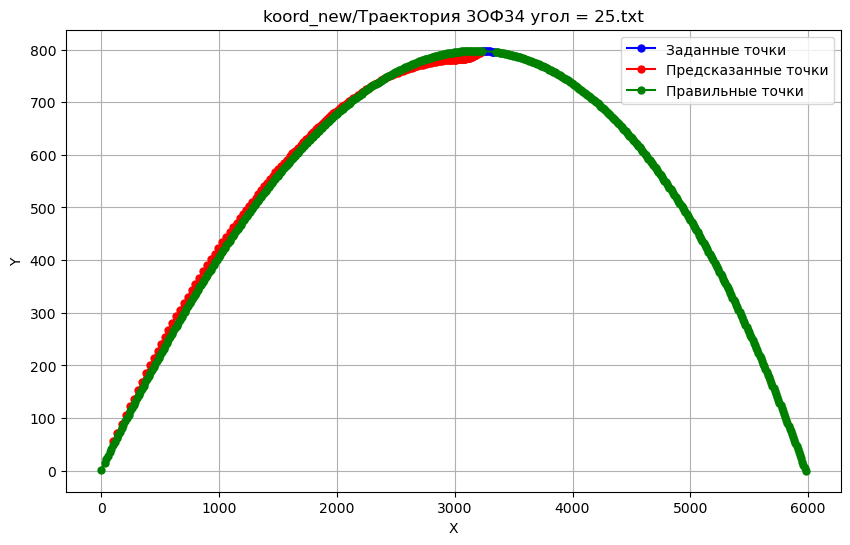

In [21]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

# Параметры
NUM_POINTS = 9
INPUT_SIZE = 4
OUTPUT_SIZE = 4
HIDDEN_SIZE = 128
NUM_HIDDEN_LAYERS = 3
MODEL_PATH = 'model_na_norm/model.pth'

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))
        layers.append(nn.ReLU())
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания
def predict_trajectory(model, data):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)
        prediction = model(inputs)
    return prediction

# Функция для чтения коэффициентов
def read_max_values(file_path):
    max_values = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.split(":")
            if len(parts) == 2:
                file_name = parts[0].strip()
                values = list(map(float, parts[1].split()))
                max_values[file_name] = values
    return max_values

# Основной блок
def main(file_path):
    max_values = read_max_values('max_values.txt')
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()
    trajectory = np.loadtxt(file_path)
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    predictions = []
    current_input = input_data
    while True:
        prediction = predict_trajectory(model, current_input)
        predictions.append(prediction.squeeze().numpy())
        if prediction.squeeze().numpy()[2] <= 0:
            break
        new_point = prediction.squeeze().numpy()
        current_input = np.vstack([new_point, current_input[:-1]])

    predictions.pop() 
    predictions.pop()  # Удаляем последнюю точку, при которой y <= 0
    file_name = os.path.basename(file_path)
    if file_name in max_values:
        scaling_factors = max_values[file_name]
    else:
        raise ValueError(f"Не найден коэффициент для файла: {file_name}")

    if len(scaling_factors) < 4:
        scaling_factors.append(1.0)

    scaled_predictions = np.array(predictions)
    scaled_predictions[:, 0] = scaled_predictions[:, 0] * scaling_factors[0]
    scaled_predictions[:, 1:] = scaled_predictions[:, 1:] * scaling_factors[1:]

    scaled_input_data = input_data.copy()
    scaled_input_data[:, 0] = scaled_input_data[:, 0] * scaling_factors[0]
    scaled_input_data[:, 1:] = scaled_input_data[:, 1:] * scaling_factors[1:]
    scaled_before_input = before_input * scaling_factors

    correct_values = np.delete(trajectory, slice(start_idx, end_idx), axis=0)
    scaled_correct_values = correct_values[:, 1:] * scaling_factors[1:]

    # Построение графика
    plt.figure(figsize=(10, 6))
    # Заданные точки
    plt.plot(
        np.concatenate(([scaled_before_input[1]], scaled_input_data[:, 1])),
        np.concatenate(([scaled_before_input[2]], scaled_input_data[:, 2])),
        '-o',
        label='Заданные точки',
        color='blue',
        markersize=5
    )
    # Предсказанные точки
    plt.plot(
        scaled_predictions[:, 1],
        scaled_predictions[:, 2],
        '-o',
        label='Предсказанные точки',
        color='red',
        markersize=5
    )
    # Правильные точки
    plt.plot(
        scaled_correct_values[:, 0],
        scaled_correct_values[:, 1],
        '-o',
        label='Правильные точки',
        color='green',
        markersize=5
    )

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(file_path)
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 25.txt'
    main(file_path)


# График через matplotlib

C:\Users\PC1\AppData\Local\Temp\ipykernel_8896\3798461807.py:63: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.




Точки из середины файла (t, x, y, z):
[[0.47787611 0.49451526 0.99938467 0.23003328]
 [0.48672566 0.50335611 1.         0.2385954 ]
 [0.49557522 0.51218677 1.         0.24733084]
 [0.50442478 0.52100742 0.99938215 0.25620494]
 [0.51327434 0.529818   0.99814897 0.26525236]
 [0.52212389 0.53861856 0.99630045 0.27443844]
 [0.53097345 0.54740917 0.99383661 0.28379784]
 [0.53982301 0.55618988 0.99075996 0.2932959 ]
 [0.54867257 0.56496076 0.98706798 0.30296728]]

Предсказанные точки (t, x, y, z):
Точка 1: [0.47267312 0.48622632 0.9964449  0.22346196]
Точка 2: [0.46401784 0.47782263 0.9943343  0.21554562]
Точка 3: [0.45511886 0.46905127 0.9916187  0.20757201]
Точка 4: [0.44661725 0.46069285 0.9885268  0.20020688]
Точка 5: [0.43819648 0.45238227 0.98445034 0.19318634]
Точка 6: [0.42989832 0.4442     0.98015785 0.18628892]
Точка 7: [0.42164028 0.43607926 0.97552437 0.1795522 ]
Точка 8: [0.41355404 0.4281396  0.97075677 0.17299831]
Точка 9: [0.40530717 0.41984275 0.9647823  0.16641584]
Точка 1

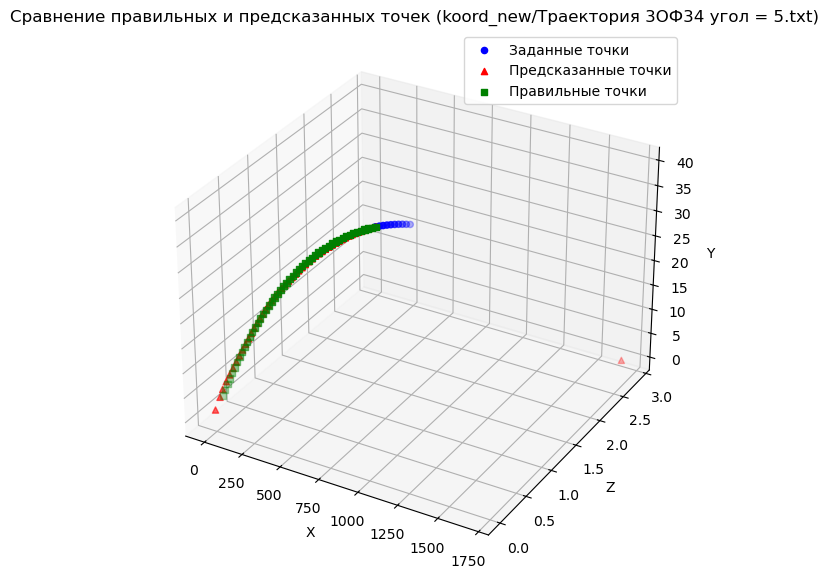

In [13]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.nn as nn

# Параметры
NUM_POINTS = 9  # Количество точек для предсказания
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_HIDDEN_LAYERS = 3  # Число скрытых слоев
MODEL_PATH = 'model_na_norm/model.pth'  # Путь для загрузки модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))  # Входной слой
        layers.append(nn.ReLU())
        
        # Добавляем скрытые слои
        for _ in range(NUM_HIDDEN_LAYERS - 1):
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        
        # Выходной слой
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для предсказания на основе 9 точек
def predict_trajectory(model, data):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        inputs = torch.tensor(data.flatten(), dtype=torch.float32).unsqueeze(0)  # Подготовка данных
        prediction = model(inputs)
    return prediction

# Функция для чтения коэффициентов из max_values.txt
def read_max_values(file_path):
    max_values = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.split(":")
            if len(parts) == 2:
                file_name = parts[0].strip()
                values = list(map(float, parts[1].split()))
                max_values[file_name] = values
    return max_values

# Основной блок
def main(file_path):
    # Читаем коэффициенты для масштабирования
    max_values = read_max_values('max_values.txt')

    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))  # Загружаем веса обученной модели
    model.eval()  # Переводим модель в режим оценки

    # Загружаем данные из файла
    trajectory = np.loadtxt(file_path)

    # Вычисляем индекс начала середины файла
    start_idx = len(trajectory) // 2 - NUM_POINTS // 2
    end_idx = start_idx + NUM_POINTS

    # Проверяем, что в середине достаточно точек
    if start_idx >= 0 and end_idx <= len(trajectory):
        input_data = trajectory[start_idx:end_idx]  # Точки из середины
    else:
        raise ValueError("В файле недостаточно точек для предсказания.")

    # Берем точку перед этим набором
    if start_idx > 0:
        before_input = trajectory[start_idx - 1]
    else:
        raise ValueError("Нет точки перед выбранными для предсказания.")

    print("\nТочки из середины файла (t, x, y, z):")
    print(input_data)

    # Предсказание
    predictions = []
    current_input = input_data  # Начинаем с текущих точек
    while True:  # Будем предсказывать, пока не встретим y <= 0
        prediction = predict_trajectory(model, current_input)
        predictions.append(prediction.squeeze().numpy())  # Сохраняем полные предсказания (включая t, x, y, z)
        
        # Проверяем координату y в последней предсказанной точке
        if prediction.squeeze().numpy()[2] <= 0:  # Если y <= 0, прекращаем предсказания
            break
        
        # Обновляем current_input: добавляем предсказанную точку в начало и удаляем последнюю
        new_point = prediction.squeeze().numpy()  # Точка с полными данными (t, x, y, z)
        current_input = np.vstack([new_point, current_input[:-1]])  # Сдвигаем и добавляем предсказанную точку

    # Убираем последнюю точку из предсказаний (которая была сделана, когда y <= 0)
    predictions.pop()  # Удаляем последнюю точку, если y <= 0

    # Печатаем предсказания
    print("\nПредсказанные точки (t, x, y, z):")
    for i, pred in enumerate(predictions):
        print(f"Точка {i+1}: {pred}")

    # Получаем коэффициенты для масштабирования, исходя из имени файла
    file_name = os.path.basename(file_path)
    if file_name in max_values:
        scaling_factors = max_values[file_name]
    else:
        raise ValueError(f"Не найден коэффициент для файла: {file_name}")

    # Проверяем количество коэффициентов в scaling_factors
    if len(scaling_factors) < 4:
        scaling_factors.append(1.0)  # Добавляем коэффициент для t, если его нет

    # Масштабируем предсказания (умножаем на коэффициенты для t, x, y, z)
    scaled_predictions = np.array(predictions)
    scaled_predictions[:, 0] = scaled_predictions[:, 0] * scaling_factors[0]  # Масштабируем t
    scaled_predictions[:, 1:] = scaled_predictions[:, 1:] * scaling_factors[1:]  # Масштабируем x, y, z

    # Печатаем масштабированные предсказанные точки
    print("\nМасштабированные предсказанные точки (t, x, y, z):")
    for i, pred in enumerate(scaled_predictions):
        print(f"Масштабированная точка {i+1}: {pred}")

    # Масштабируем исходные точки
    scaled_input_data = input_data.copy()
    scaled_input_data[:, 0] = scaled_input_data[:, 0] * scaling_factors[0]  # Масштабируем t
    scaled_input_data[:, 1:] = scaled_input_data[:, 1:] * scaling_factors[1:]  # Масштабируем x, y, z
    scaled_before_input = before_input * scaling_factors

    # Правильные точки (предыдущие NUM_PREDICTIONS точек)
    correct_num_points = min(len(scaled_predictions), start_idx)  # Ограничиваем числом доступных точек
    correct_values = trajectory[start_idx - correct_num_points: start_idx, 1:]  # Берём предыдущие правильные точки

    # Масштабируем правильные точки (используем только первые три коэффициента для x, y, z)
    scaled_correct_values = correct_values * scaling_factors[1:]  # Масштабируем только x, y, z

    # Печатаем правильные точки
    print("\nПравильные точки (t, x, y, z):")
    for i, correct in enumerate(scaled_correct_values):
        print(f"Правильная точка {i+1}: {correct}")

    # Построение 3D графика с использованием matplotlib
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Исходные точки (включая точку до выбранных)
    ax.scatter(
        np.concatenate(([scaled_before_input[1]], scaled_input_data[:, 1])),  # x
        np.concatenate(([scaled_before_input[3]], scaled_input_data[:, 3])),  # z (меняем с y)
        np.concatenate(([scaled_before_input[2]], scaled_input_data[:, 2])),  # y (меняем с z)
        c='blue', label='Заданные точки', marker='o'
    )

    # Предсказанные точки (t, x, y, z)
    ax.scatter(
        scaled_predictions[:, 1],  # x
        scaled_predictions[:, 3],  # z (меняем с y)
        scaled_predictions[:, 2],  # y (меняем с z)
        c='red', label='Предсказанные точки', marker='^'
    )

    # Правильные точки
    ax.scatter(
        scaled_correct_values[:, 0],  # x
        scaled_correct_values[:, 2],  # z (меняем с y)
        scaled_correct_values[:, 1],  # y (меняем с z)
        c='green', label='Правильные точки', marker='s'
    )

    # Настройки графика
    ax.set_xlabel('X')
    ax.set_ylabel('Z')  # z-координата по оси Y
    ax.set_zlabel('Y')  # y-координата по оси Z
    ax.set_title(f"Сравнение правильных и предсказанных точек ({file_path})")

    # Легенда
    ax.legend()

    # Показать график
    plt.show()

if __name__ == '__main__':
    file_path = 'koord_new/Траектория 3ОФ34 угол = 5.txt'  # Укажите путь к вашему файлу
    main(file_path)


# Старые графики

In [ ]:
import os
import torch
import numpy as np
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
# Параметры
INPUT_SIZE = 4  # Число входных характеристик (t, x, y, z)
OUTPUT_SIZE = 4  # Число выходных характеристик (t, x, y, z)
HIDDEN_SIZE = 128  # Число нейронов в скрытом слое
NUM_POINTS = 9  # Количество точек для предсказания
MODEL_PATH = 'model_obr/model.pth'  # Путь к сохраненной модели

# Модель
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor, self).__init__()
        layers = []
        layers.append(nn.Linear(NUM_POINTS * INPUT_SIZE, HIDDEN_SIZE))
        layers.append(nn.ReLU())
        for _ in range(3 - 1):  # 3 скрытых слоя
            layers.append(nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция предсказания предыдущей точки
def predict_previous_point(input_data):
    # Загружаем модель
    model = TrajectoryPredictor()
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()  # Переводим модель в режим предсказания

    with torch.no_grad():
        # Преобразуем входные данные в тензор
        input_tensor = torch.tensor(input_data, dtype=torch.float32)
        
        # Прогоняем через модель
        output = model(input_tensor.flatten())

    return output.numpy()  # Возвращаем предсказания в виде массива NumPy

# Пример использования
if __name__ == '__main__':
    # Ваши входные данные для предсказания
    input_data = np.array([
        [2.6500, 824.4947, 39.5801, 0.6393],
        [2.7000, 839.5208, 39.6291, 0.6636],
        [2.7500, 855.5208, 39.6801, 0.6869],
        [2.8000, 871.5608, 39.7301, 0.7061],
        [2.8500, 888.8012, 39.7771, 0.7369],
        [2.9000, 905.2201, 39.8211, 0.7514],
        [2.9500, 922.2069, 39.8771, 0.7900],
        [3.0000, 938.2208, 39.8136, 0.8158],
        [3.0500, 944.2236, 39.2871, 0.8461]
    ])
#2.6000 809.4513 39.5065 0.6155
    # Вызываем функцию предсказания
    predicted_previous_point = predict_previous_point(input_data)
    print("Предсказанная предыдущая точка:", predicted_previous_point)


Предсказанная предыдущая точка: [2.5457654e+00 8.1095245e+02 3.9142532e+01 7.8389084e-01]


C:\Users\PC1\AppData\Local\Temp\ipykernel_908\3059101746.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))


# Предсказывает сразу несколько точек и записывает в файл

In [18]:
import numpy as np

# Исходные данные
input_data = np.array([
    [2.6500, 824.4947, 39.5801, 0.6393],
    [2.7000, 839.5208, 39.6291, 0.6636],
    [2.7500, 855.5208, 39.6801, 0.6869],
    [2.8000, 871.5608, 39.7301, 0.7061],
    [2.8500, 888.8012, 39.7771, 0.7369],
    [2.9000, 905.2201, 39.8211, 0.7514],
    [2.9500, 922.2069, 39.8771, 0.7900],
    [3.0000, 938.2208, 39.8136, 0.8158],
    [3.0500, 944.2236, 39.2871, 0.8461]
])


# Функция для предсказания предыдущей точки (не меняем её)

# Открываем файл для записи
file_path = r"C:\Users\PC1\Desktop\Курсач\pred_tray\predicted_points.txt"
with open(file_path, "w") as file:
    for i in range(40):
        # Получаем predicted_previous_point
        predicted_previous_point = predict_previous_point(input_data)
        
        # Записываем predicted_previous_point в файл, разделяя пробелами
        np.savetxt(file, [predicted_previous_point], delimiter=' ', fmt='%.8f')
        
        #file.write("\n")  # Добавляем новую строку в файл

        # Обновляем input_data, добавляя predicted_previous_point в начало и удаляя последнюю строку
        input_data = np.vstack([predicted_previous_point, input_data[:-1]])

print(f"Predicted points have been saved to {file_path}")


Predicted points have been saved to C:\Users\PC1\Desktop\Курсач\pred_tray\predicted_points.txt


C:\Users\PC1\AppData\Local\Temp\ipykernel_908\3059101746.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))


# Построение графика

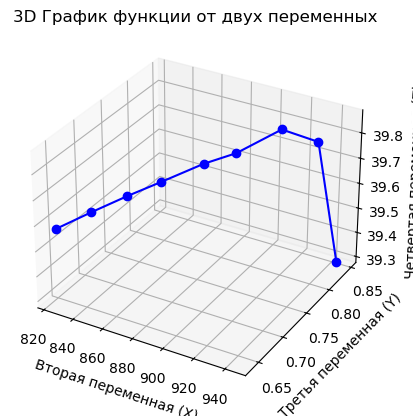

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ваши данные
input_data = np.array([
    [2.6500, 824.4947, 39.5801, 0.6393],
    [2.7000, 839.5208, 39.6291, 0.6636],
    [2.7500, 855.5208, 39.6801, 0.6869],
    [2.8000, 871.5608, 39.7301, 0.7061],
    [2.8500, 888.8012, 39.7771, 0.7369],
    [2.9000, 905.2201, 39.8211, 0.7514],
    [2.9500, 922.2069, 39.8771, 0.7900],
    [3.0000, 938.2208, 39.8136, 0.8158],
    [3.0500, 944.2236, 39.2871, 0.8461]
])

# Извлечение данных для графика
x = input_data[:, 1]  # Вторая переменная
y = input_data[:, 2]  # Третья переменная
z = input_data[:, 3]  # Четвертая переменная (значения по оси Z)

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение линии
ax.plot(x, z, y, color='b', marker='o')  # 'marker' добавляет точки на линии

# Установка меток осей
ax.set_xlabel('Вторая переменная (X)')
ax.set_ylabel('Третья переменная (Y)')
ax.set_zlabel('Четвертая переменная (Z)')

# Показ графика
plt.title('3D График функции от двух переменных')
plt.show()


# График по файлу

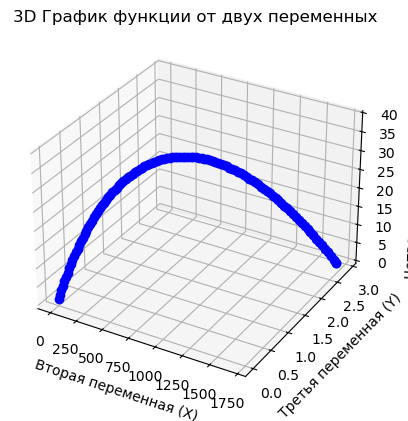

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Путь к вашему файлу
file_path = '3ОФ34 - 120mm_new/Траектория 3ОФ34 угол = 5.txt'

# Загрузка данных из файла
input_data = np.loadtxt(file_path)

# Извлечение данных для графика
x = input_data[:, 1]  # Вторая переменная
y = input_data[:, 2]  # Третья переменная
z = input_data[:, 3]  # Четвертая переменная (значения по оси Z)

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение линии
ax.plot(x, z, y, color='b', marker='o')  # 'marker' добавляет точки на линии

# Установка меток осей
ax.set_xlabel('Вторая переменная (X)')
ax.set_ylabel('Третья переменная (Y)')
ax.set_zlabel('Четвертая переменная (Z)')

# Показ графика
plt.title('3D График функции от двух переменных')
plt.show()


# Два графика на одном

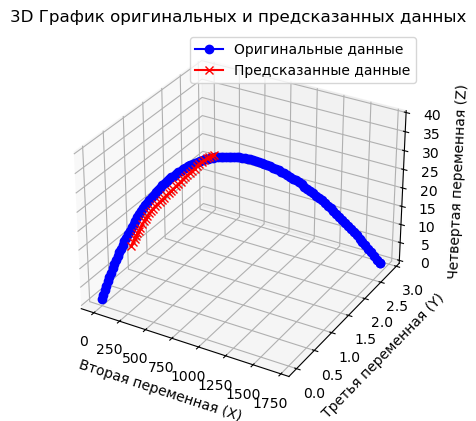

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Путь к вашим файлам
file_path = '3ОФ34 - 120mm_new/Траектория 3ОФ34 угол = 5.txt'
predicted_file_path = 'pred_tray/predicted_points.txt'

# Загрузка данных из файлов
input_data = np.loadtxt(file_path)
predicted_data = np.loadtxt(predicted_file_path)

# Извлечение данных для графика
x = input_data[:, 1]  # Вторая переменная
y = input_data[:, 2]  # Третья переменная
z = input_data[:, 3]  # Четвертая переменная (значения по оси Z)

# Извлечение данных для предсказанных точек
pred_x = predicted_data[:, 1]  # Первая переменная (X) из предсказанных данных
pred_y = predicted_data[:, 2]  # Вторая переменная (Y)
pred_z = predicted_data[:, 3]  # Третья переменная (Z)

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение линии для оригинальных данных
ax.plot(x, z, y, color='b', marker='o', label='Оригинальные данные')

# Построение линии для предсказанных данных
ax.plot(pred_x, pred_z, pred_y, color='r', marker='x', label='Предсказанные данные')

# Установка меток осей
ax.set_xlabel('Вторая переменная (X)')
ax.set_ylabel('Третья переменная (Y)')
ax.set_zlabel('Четвертая переменная (Z)')

# Добавление легенды
ax.legend()

# Показ графика
plt.title('3D График оригинальных и предсказанных данных')
plt.show()
